<div class="alert alert-success">
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные и отмечены **#ок** - всё сделано правильно; жёлтые и отмечены **#можно лучше** - есть замечания, но не критично; красные с пометкой **#ошибка** - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

# Поиск клиентов с неоптимальным тарифом

## План работы над проектом

**1. Предобработка данных**

- [x] Изучение пропусков данных
- [x] Проверка на явные и скрытые дубликаты
- [x] Объединение таблиц в единый датасет

**2. Исследовательский анализ**

**2.1 Изучить временной период данных:**
- [x] как менялось количество клиентов
- [x] какой средний срок жизни активного клиента 

**2.2 Составить портрет клиента:**
- [x] Количество операторов
- [x] количество активных и неактивных операторов среди активных клиентов
- [x] выделить категорию клиентов на основании категории операторов: обзвоны (преимущественно внешние исходящие звонки, OUT) и служба поддержки (преимущественно внешние входящие звонки, IN), добавить столбец с обозначением категории. 
- [x] Составить сводную таблицу: клиент / тариф/ количество операторов/ плата за 1 оператора/ продожительность звонков OUT/ стоимость тарифа OUT/ количество звонков OUT INTERNAL/ лимит внутренних звонков/ стоимость тарифа OUT INTERNAL/ абонентская плана/ оплата за операторов_total/ оплата за исходящие звонки_total/ оплата за внутренние звонки_total/ финальная сумма за месяц

**2.3 Составить краткую картину тарифных планов:**
- [x] количество клиентов
- [x] среднее количество операторов у 1 клиента
- [x] средний доход в месяц
- [x] Составить текущую финансовую картину: 
- [x] средний доход в месяц с клиента,
- [x] как менялась средняя месячная выручка компании за весь период времени
- [x] Сравним текущие доходы и ожидаемые в случае смены тарифа имеющимся клиентами

**3. Проверка гипотез**
- [x] Уровень дополнительного дохода за счет использования клиентами неоптимального тарифа не отличается для разных тарифных планов
- [x] Средний доход от клиентов колл-центра (преимущественно внешние исходящие звонки) и службы поддержки (преимущественно внешние входящие звонки) не отличаются

**4. Краткие выводы и рекомендации**

**5.Подготовка презентационных материалов**

## Подготовительный этап

In [1]:
# импорт библиотек
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
clients = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_clients.csv')
clients

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')
df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [5]:
df.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [6]:
df.duplicated().sum()

4900

**Краткий обзор данных**

Датасет содержит данные о действиях клиентов в сервисе интернет-телефонии

- Состоит из 53 902 строк
- В столбцах *internal* и *operator_id* содержатся пропуски
- Выявлено 4 900 полных дубликатов (9%)
- Необходимо перевести данные: 
    - в столбце *date* в формат datetime, 
    - в столбце *internal* в формат bool, 
    - в столбце *operator_id* в формат int64

## Предобработка данных

In [7]:
#заполним пропуски в стобцах на 0 для дальнейшей обработки
df['operator_id'] = df['operator_id']. fillna (0)
df['internal'] = df['internal'].fillna (0)

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Да, можно так поработать с пропусками.

Но важно понимать, что 0 в internal будет интерпритирован, как False, а не как заглушка.

А вот в идентификаторе оператора использование заглушки вполне рабочий вариант
</div>

In [8]:
#приведем дату наблюдения (столбец date) в формат datetime

df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)

#приведем cтолбец internal в формал bool
df['internal'] = df['internal'].astype('bool')

#приведем cтолбец operator_id в формал int64
df['operator_id'] = df['operator_id'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53902 non-null  bool          
 4   operator_id          53902 non-null  int64         
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(5), object(1)
memory usage: 3.0+ MB


In [9]:
#проверим столбец direction на неявные дубликаты
df['direction'].unique()

array(['in', 'out'], dtype=object)

In [10]:
#проверим столбец internal на неявные дубликаты
df['internal'].unique()

array([False,  True])

In [11]:
#на предыдущем этапе мы обнаружили почти 5 тыс дубликатов. удалим их для дальнейшей работы

df = df.drop_duplicates().reset_index(drop=True)

# проверка
print('Количество дубликатов = ', df.duplicated().sum())

Количество дубликатов =  0


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

В целом можно так поработать с дублями.

Но все же как правило стоит чуть повнимтельнее к ним относиться. Поподробнее их стоит рассматривать перед возможным удалением.

Также неявные дубликаты стоило проанализировать. У нас есть текстовый столбец direction и там никак не отрегулировано то, чем он может быть заполнен. В столбце internal тоже тип object, т.е. тоже нет гарантии, что там только true и False ... Стоит проконтролировать такие моменты на предобработке.

Возможно, ты это смотрела, когда просто крутила данные, но в итоговом варианте это стоит оставлять.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
 
Добавила проверку на неявные дубликаты в стобцах internal и direction.


Вопрос:Если у нас идет полное совпадение строк, разве их не надо удалять в любом случае?
    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо.

В обработке данных вообще нет "обязательных" процедур. В том числе и удаление дубликатов не является строго обязательным. Можно привести разные пример и кажется у вас в одном из первых проектов была ситуация, когда в таблице не было поля идентификатора пользователя и соответственно дубликаты могли быть действительно одинаковыми пользователям по полу/возрасту и другим параметрам просто совпадающие. Также можно привеси пример записи покупок. Если у нас для покупки указана просто дата без времени, то в принципе один и тот же пользователь может в течении дня совершить одну и ту же покупку. В таких случаях одинаковые записи также не требуется удалять. 

</div>

In [12]:
df.isnull().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

In [13]:
df_operator_null = df[df['operator_id'] == 0]
df_operator_null

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,0,True,2,0,4
7,166377,2019-08-05,in,False,0,True,6,0,35
8,166377,2019-08-06,in,False,0,True,4,0,62
16,166377,2019-08-07,in,False,0,True,2,0,24
26,166377,2019-08-12,in,False,0,True,2,0,34
...,...,...,...,...,...,...,...,...,...
48978,168601,2019-11-27,in,False,0,True,2,0,39
48982,168601,2019-11-28,in,False,0,True,1,0,19
48990,168603,2019-11-28,in,False,0,True,1,0,30
48994,168606,2019-11-08,in,False,0,True,6,0,121


In [14]:
#проверим есть ли зависимость отсутствия id оператора от типа звонка
print(df_operator_null['direction'].value_counts())

print('')

#проверим есть ли зависимость отсутствия id оператора от типа звонка
print(df_operator_null['internal'].value_counts())

in     7270
out     186
Name: direction, dtype: int64

False    7133
True      323
Name: internal, dtype: int64


Пока не понятно, как можно заполнить пропуски по столбцу operator_id, оставим в текущем виде

In [15]:
#проверим датасет на аномалии по количеству и продолжительности звонков
df_calls = df[['calls_count', 'call_duration', 'total_call_duration']]
df_calls.describe()

,calls_count,call_duration,total_call_duration
count,49002.000000,49002.000000,49002.000000
mean,16.462777,866.282091,1156.558202
std,63.604098,3775.503352,4451.473661
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,46.000000
50%,4.000000,37.000000,208.000000
75%,12.000000,570.000000,901.000000
max,4817.000000,144395.000000,166155.000000


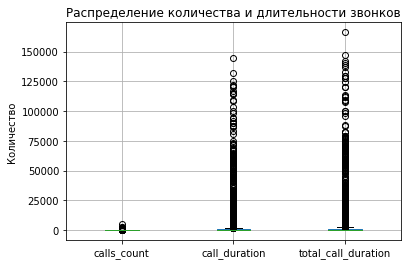

In [16]:
#построим диаграмму распределения

df_calls.boxplot()
plt.title('Распределение количества и длительности звонков')
plt.ylabel('Количество')
plt.show()

На графике видно большое количество выбросов, однако стоит отметить тот факт, что звонки длительностью меньше 1 минуты приравниваются к 1 минуте разговора, т.е. если оператор совершил 4 исходящих звонка в минуту, то в таблице это будет записано как 4 минуты. Этим можно объяснить выбросы в столбце количества звонков.  
Столбцы call_duration и total_call_duration агрегированные, но даже в сумме вряд ли можно столько наговорить даже за 24 часа. Удалим записи, где значения в ячейке больше значения 97 перцентиля соответствующего столбца - так мы потеряем не много данных.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**


Работать просто с записями - это возможный вариант. Но в целом лучше всегда говорить о каких-то понятных бизнес-величинах. Сейчас запись - это нечто не очень понятное, это и не количество звонков в день и не количество звонков на оператора, т.к. мы имеем дело со специфически агрегированной таблицей. Чтобы получить количество звонков в день в КЦ нужно проделать дополнительные вычисления. Аналогично, чтобы оценить длительность одного звонка или длительность звонков в КЦ нужно дополнительные вычисления проделать.
    
</div>

In [17]:
#удаляем аномалии в столбцах call_duration и total_call_duration 

df = (df.loc[(df['call_duration'] <= df['call_duration'].quantile(.97)) 
             & (df['total_call_duration'] <= df['total_call_duration'].quantile(.97))])
df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,0,True,2,0,4
1,166377,2019-08-05,out,True,880022,True,3,0,5
2,166377,2019-08-05,out,True,880020,True,1,0,1
3,166377,2019-08-05,out,True,880020,False,1,10,18
4,166377,2019-08-05,out,False,880022,True,3,0,25
...,...,...,...,...,...,...,...,...,...
48997,168606,2019-11-10,out,True,957922,False,1,0,25
48998,168606,2019-11-10,out,True,957922,True,1,0,38
48999,168606,2019-11-11,out,True,957922,False,2,479,501
49000,168606,2019-11-15,out,True,957922,False,4,3130,3190


In [18]:
#объединим таблицы в единый датасет
df =  df.merge(clients, on='user_id', how='inner')
df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,0,True,2,0,4,B,2019-08-01
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...
47335,168606,2019-11-10,out,True,957922,False,1,0,25,C,2019-10-31
47336,168606,2019-11-10,out,True,957922,True,1,0,38,C,2019-10-31
47337,168606,2019-11-11,out,True,957922,False,2,479,501,C,2019-10-31
47338,168606,2019-11-15,out,True,957922,False,4,3130,3190,C,2019-10-31


In [19]:
#приведем столбец с датой регистрации к формату datetime
df['date_start'] = pd.to_datetime(df['date_start'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47340 entries, 0 to 47339
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              47340 non-null  int64         
 1   date                 47340 non-null  datetime64[ns]
 2   direction            47340 non-null  object        
 3   internal             47340 non-null  bool          
 4   operator_id          47340 non-null  int64         
 5   is_missed_call       47340 non-null  bool          
 6   calls_count          47340 non-null  int64         
 7   call_duration        47340 non-null  int64         
 8   total_call_duration  47340 non-null  int64         
 9   tariff_plan          47340 non-null  object        
 10  date_start           47340 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](2), int64(5), object(2)
memory usage: 3.7+ MB


**Краткий обзор данных**

- Заменили пропуски в столбцах на 0 для дальнейшей обработки
- Привели данные к необходимому типу данных
- Удалили полные дубликаты
- Выявили аномалии и удалили из дальнейшей работы

## Исследовательский анализ данных

### Исследование временного периода и активности клиентов

In [20]:
#изучим временной отрезок данных

print ('Минимальная дата:', df['date'].min())
print ('Максимальная дата:', df['date'].max())
period = df['date'].max() - df['date'].min()
print('Временной период', period)

Минимальная дата: 2019-08-02 00:00:00
Максимальная дата: 2019-11-28 00:00:00
Временной период 118 days 00:00:00


В нашем распоряжении данные за период с 2 августа по 28 ноября 2019 года (4 месяца)

In [21]:
# данные по дате и вычисляем количество звонков
call_by_date = df.groupby('date')['calls_count'].count().reset_index()
call_by_date

,date,calls_count
0,2019-08-02,8
1,2019-08-03,8
2,2019-08-04,4
3,2019-08-05,15
4,2019-08-06,21
...,...,...
114,2019-11-24,265
115,2019-11-25,1073
116,2019-11-26,1004
117,2019-11-27,1050


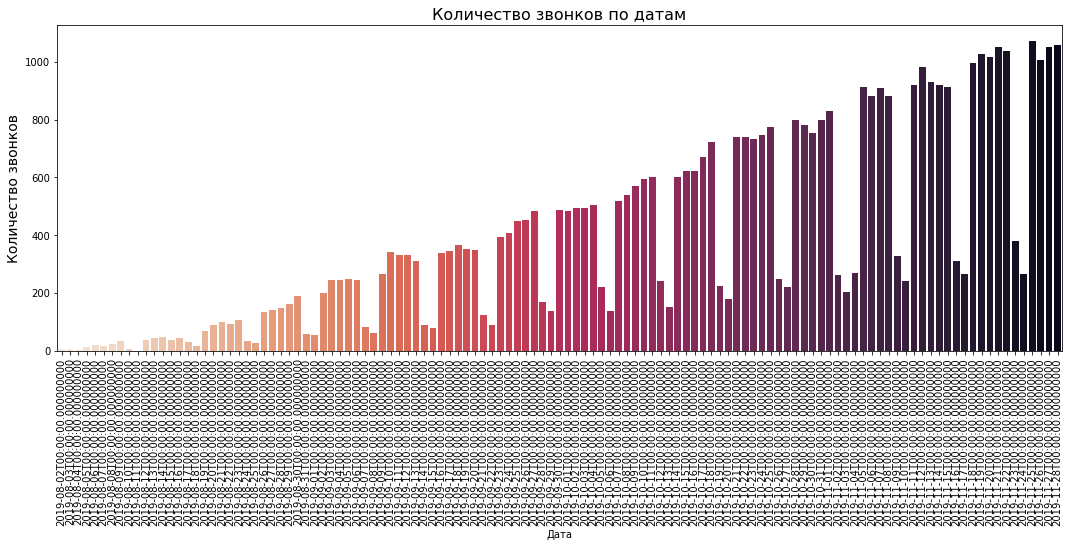

In [22]:
# Создаем столбчатую диаграмму с использованием Seaborn
plt.figure(figsize=(18, 6))
sns.barplot(data = call_by_date, x='date', y='calls_count', palette='rocket_r')
plt.title('Количество звонков по датам', fontsize=16)
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.ylabel('Количество звонков', fontsize=14)
plt.show()

На графике явно прослеживается тенденция активных звонков в будние дни и минимум звонков в выходные

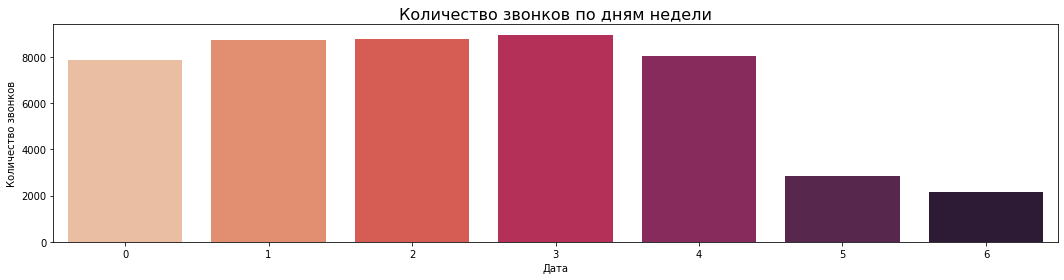

In [23]:
#добавим столбец с днями недели
df['day_of_week'] = df['date']. dt.weekday
df

# соберем данные по дню недели и вычмислим количество звонков
calls_by_day_of_week = df.groupby('day_of_week')['calls_count'].count().reset_index()
calls_by_day_of_week

# Создаем столбчатую диаграмму с использованием Seaborn
plt.figure(figsize=(18, 4))
sns.barplot(data=calls_by_day_of_week, x='day_of_week', y='calls_count', palette='rocket_r')
plt.title('Количество звонков по дням недели', fontsize=16)
plt.xlabel('Дата')
plt.ylabel('Количество звонков')

plt.show()

In [24]:
# данные по дате и вычисляем количество клиентов
client_by_date = df.groupby('date')['user_id'].nunique().reset_index()
client_by_date

,date,user_id
0,2019-08-02,2
1,2019-08-03,2
2,2019-08-04,2
3,2019-08-05,3
4,2019-08-06,6
...,...,...
114,2019-11-24,89
115,2019-11-25,168
116,2019-11-26,167
117,2019-11-27,169


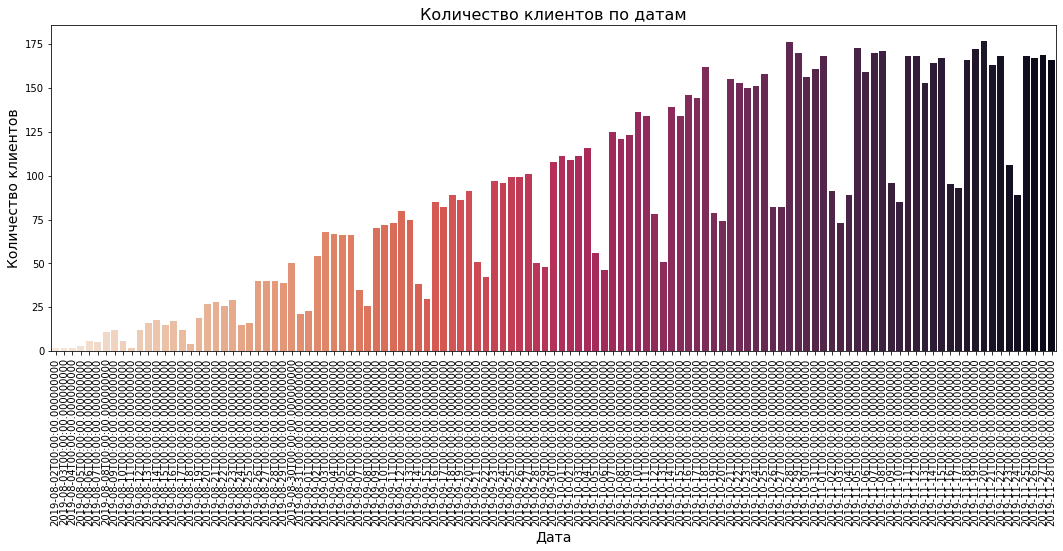

In [25]:
# Создаем столбчатую диаграмму с использованием Seaborn
plt.figure(figsize=(18, 6))
sns.barplot(data=client_by_date, x='date', y='user_id', palette='rocket_r')
plt.title('Количество клиентов по датам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Количество клиентов', fontsize=14)
plt.show()

Количество клиентов постепенно увеличивается, при этом мы знаем, что наш заказчик давно на рынке и в начале анализа не может быть такого низкого числа клиентов.  
Посмотрим, что по датам регистрации клиентов

In [26]:
# данные по дате регистрации и вычисляем количество клиентов
client_by_start_date = df.groupby('date_start')['user_id'].nunique()
client_by_start_date

date_start
2019-08-01    4
2019-08-02    4
2019-08-05    2
2019-08-06    6
2019-08-07    4
             ..
2019-10-26    1
2019-10-28    6
2019-10-29    1
2019-10-30    1
2019-10-31    8
Name: user_id, Length: 66, dtype: int64

In [27]:
client_by_start_date.describe()

count    66.000000
mean      4.651515
std       2.753976
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      15.000000
Name: user_id, dtype: float64

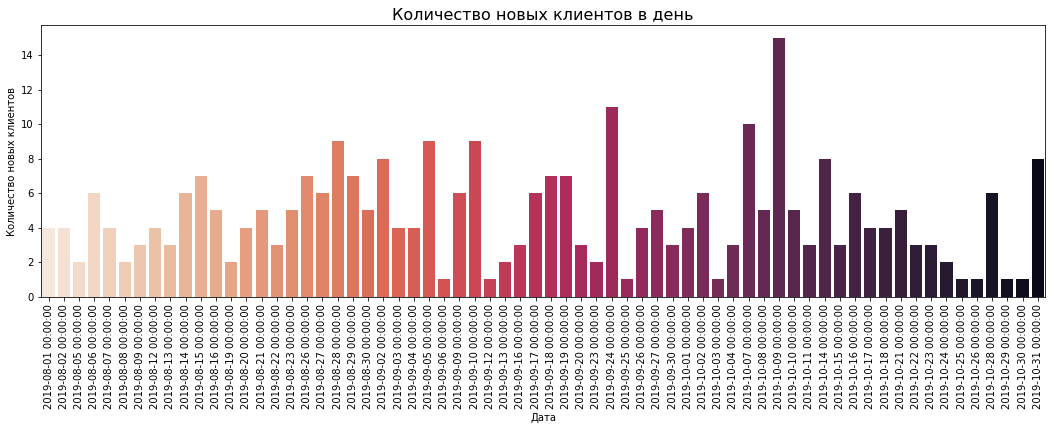

In [28]:
# Создаем столбчатую диаграмму с использованием Seaborn
plt.figure(figsize=(18, 5))
sns.barplot(x=client_by_start_date.index, y=client_by_start_date.values, palette='rocket_r')
plt.title('Количество новых клиентов в день', fontsize=16)
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.ylabel('Количество новых клиентов')
plt.show()

Выявлено, что в датасете включены только новые клиенты, зарегистрировавшиеся в системе в период с 1 августа по 31 октября 2019 года, поэтому такие низкие показатели в начале периода наблюдения.  
В среднем в день было зарегистрировано 5 новых клиента

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Здорово, что ты подробно рассмотрела этот момент, но все же в данном случае август лучше исключить. Возможно, для некоторых клинетов он был не полным, также он был очень не полным по количеству клиентов, поэтому отбросив его мы потеряем не много данных и лучше с сентября начать анализ
</div>


In [29]:
#посмотрим среднее количество клиентов в каждом месяце
client_by_date['month'] = pd.to_datetime(client_by_date["date"]).dt.month
client_by_date.groupby('month')['user_id'].mean()

month
8      17.833333
9      68.900000
10    122.225806
11    142.642857
Name: user_id, dtype: float64

In [30]:
#поскольку в нашем датасете используются данные по клиентам, которые начали регистрироваться в системе с 1 августа,
#то мы наблюдаем в августе крайне низкие цифры по количеству клиентов в день (18 чел) при цифрах в октябре и ноябре свыше 120 чел.

# удалим данные за август из дальнейшего анализа
df['active_month']=pd.to_datetime(df["date"]).dt.month
df=df.loc[df['active_month'] != 8]
df['active_month'].value_counts()

11    20924
10    16542
9      8095
Name: active_month, dtype: int64

In [31]:
#составим сводную таблицу по датам активности пользователя(от даты регистрации до даты последней активности)
period_of_user_life = df.groupby('user_id').agg({'date':'last', 'date_start':'first'}).reset_index()
period_of_user_life['lifetime'] = period_of_user_life['date']-period_of_user_life['date_start']
period_of_user_life['lifetime'] = period_of_user_life['lifetime'].astype('str')
period_of_user_life['lifetime'] = period_of_user_life['lifetime'].str.replace(' days', '')
period_of_user_life['lifetime'] = period_of_user_life['lifetime'].astype('int64')
period_of_user_life = period_of_user_life.sort_values(by ='lifetime', ascending=False)
period_of_user_life

,user_id,date,date_start,lifetime
0,166377,2019-11-28,2019-08-01,119
2,166392,2019-11-28,2019-08-01,119
4,166405,2019-11-28,2019-08-02,118
5,166406,2019-11-28,2019-08-02,118
6,166407,2019-11-28,2019-08-02,118
...,...,...,...,...
84,167009,2019-09-03,2019-08-28,6
192,167768,2019-10-03,2019-09-30,3
191,167759,2019-09-30,2019-09-27,3
103,167113,2019-09-03,2019-09-02,1


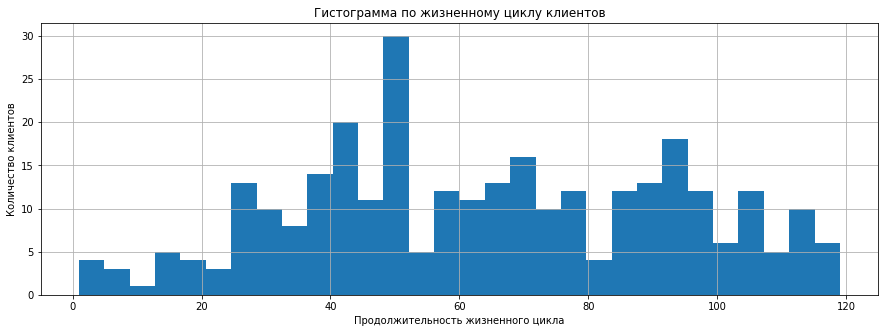

In [32]:
#построим гистограмму по жизненному циклу клиентов
period_of_user_life['lifetime'].hist(bins=30, figsize=(15, 5))
plt.title('Гистограмма по жизненному циклу клиентов')
plt.ylabel('Количество клиентов')
plt.xlabel('Продолжительность жизненного цикла')
plt.show()

In [33]:
#выделим отлельные столбцы по месяцу регистрации и месяцу последней активности
period_of_user_life["first_month"] = pd.to_datetime(period_of_user_life["date_start"]).dt.month
period_of_user_life["last_month"] = pd.to_datetime(period_of_user_life["date"]).dt.month
period_of_user_life

,user_id,date,date_start,lifetime,first_month,last_month
0,166377,2019-11-28,2019-08-01,119,8,11
2,166392,2019-11-28,2019-08-01,119,8,11
4,166405,2019-11-28,2019-08-02,118,8,11
5,166406,2019-11-28,2019-08-02,118,8,11
6,166407,2019-11-28,2019-08-02,118,8,11
...,...,...,...,...,...,...
84,167009,2019-09-03,2019-08-28,6,8,9
192,167768,2019-10-03,2019-09-30,3,9,10
191,167759,2019-09-30,2019-09-27,3,9,9
103,167113,2019-09-03,2019-09-02,1,9,9


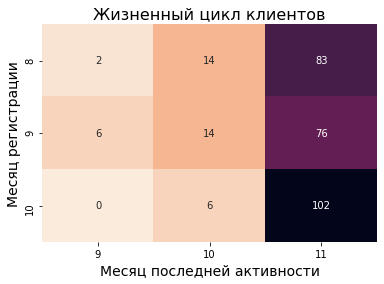

In [34]:
#построим тепловую карту продолжительности жизни клиентов
period_of_user_life_matrix = period_of_user_life.pivot_table(index='first_month', 
                                                             columns='last_month', 
                                                             values='user_id', 
                                                             aggfunc='nunique', 
                                                             fill_value=0)

sns.heatmap(period_of_user_life_matrix, cmap='rocket_r', annot=True, fmt='d', cbar=False)
plt.title('Жизненный цикл клиентов', fontsize=16)
plt.xlabel('Месяц последней активности', fontsize=14)
plt.ylabel('Месяц регистрации', fontsize=14)
plt.show()

Большинство клиентов сотаются с нами до настоящего момент, однако 41 клиент (13%) не стали продлевать с нами сотрудничество.  
Рассмотрим их подробнее

In [35]:
#выделим неактивных пользователей в ноябре
inactive_user = period_of_user_life.loc[period_of_user_life['last_month'] !=11]
inactive_user.reset_index(drop=False)

,index,user_id,date,date_start,lifetime,first_month,last_month
0,3,166399,2019-10-23,2019-08-01,83,8,10
1,29,166666,2019-10-25,2019-08-14,72,8,10
2,45,166727,2019-10-26,2019-08-16,71,8,10
3,58,166874,2019-10-29,2019-08-22,68,8,10
4,8,166481,2019-10-11,2019-08-05,67,8,10
5,72,166958,2019-10-30,2019-08-26,65,8,10
6,66,166936,2019-10-30,2019-08-26,65,8,10
7,31,166671,2019-10-14,2019-08-14,61,8,10
8,107,167125,2019-10-31,2019-09-03,58,9,10
9,122,167189,2019-10-31,2019-09-05,56,9,10


41 пользователь из 303 (13%) не оформляли подписку на ноябрь 2019 года, исключим их из дальнейшего анализа.

Однако, отдельно рассмотрим пользователей (23 клиента или 8 %), которые прекратили подписку в октябре и сентябре 2019 года и имеют продолжительность активности более 30 дней - это "потерянные клиенты", возможно именно их мы сможем вернуть, если предложим привлекательные условия

In [36]:
#отдельно посмотрим пользователей с активностью меньше 28 дней
inactive_user_2 = period_of_user_life.loc[(period_of_user_life['last_month'] == 11) & (period_of_user_life['lifetime'] <28)]
inactive_user_2.sort_values(by='date')

,user_id,date,date_start,lifetime,first_month,last_month
222,167981,2019-11-03,2019-10-08,26,10,11
263,168202,2019-11-05,2019-10-16,20,10,11
277,168329,2019-11-08,2019-10-22,17,10,11
285,168446,2019-11-08,2019-10-25,14,10,11
296,168578,2019-11-19,2019-10-31,19,10,11
302,168606,2019-11-19,2019-10-31,19,10,11
295,168575,2019-11-23,2019-10-31,23,10,11
290,168481,2019-11-24,2019-10-28,27,10,11
292,168500,2019-11-24,2019-10-28,27,10,11


В целом таких пользователей немного, преимущественно те, кто присоединился к нашему сервису в конце октября

In [37]:
#выделим в отдельный датафрейм потерянных клиентов
lost_user = inactive_user.loc[inactive_user['lifetime']>=30]
lost_user = lost_user[['user_id','lifetime']]
lost_user = lost_user.merge(df, on='user_id', how='inner') 
lost_user

# вернемся к нему позже

,user_id,lifetime,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,day_of_week,active_month
0,166399,83,2019-09-02,in,False,886674,False,1,35,115,C,2019-08-01,0,9
1,166399,83,2019-09-02,in,False,0,False,1,68,115,C,2019-08-01,0,9
2,166399,83,2019-10-01,in,False,0,True,1,0,23,C,2019-08-01,1,10
3,166399,83,2019-10-02,in,False,886674,False,1,1,12,C,2019-08-01,2,10
4,166399,83,2019-10-02,in,False,0,True,1,0,17,C,2019-08-01,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,167053,33,2019-09-18,in,False,903292,False,2,17,55,C,2019-08-29,2,9
1301,167053,33,2019-09-19,out,False,903292,False,1,94,99,C,2019-08-29,3,9
1302,167053,33,2019-09-20,out,False,903292,False,1,130,138,C,2019-08-29,4,9
1303,167053,33,2019-09-20,in,False,903292,False,1,181,198,C,2019-08-29,4,9


In [38]:
#выделим датафрейм с активными пользователями, с которым продолжим дальнейшую работу

active_user = period_of_user_life.loc[period_of_user_life['last_month'] ==11]
active_user = active_user[['user_id','lifetime']]
active_user = active_user.merge(df, on='user_id', how='inner') 
active_user

,user_id,lifetime,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,day_of_week,active_month
0,166377,119,2019-09-02,in,False,880028,False,2,66,75,B,2019-08-01,0,9
1,166377,119,2019-09-02,in,False,880026,False,1,31,34,B,2019-08-01,0,9
2,166377,119,2019-09-02,out,False,880026,False,16,1853,1983,B,2019-08-01,0,9
3,166377,119,2019-09-02,out,False,880026,True,6,0,168,B,2019-08-01,0,9
4,166377,119,2019-09-02,out,False,880028,False,20,2529,2687,B,2019-08-01,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42866,168329,17,2019-11-07,in,False,0,True,1,0,2,B,2019-10-22,3,11
42867,168329,17,2019-11-08,in,False,0,True,1,0,2,B,2019-10-22,4,11
42868,168446,14,2019-10-28,in,False,0,True,3,0,1,B,2019-10-25,0,10
42869,168446,14,2019-10-31,in,False,0,True,1,0,2,B,2019-10-25,3,10


In [39]:
#посмотрим на активность клиентов по количеству звонков
active_user_1 = active_user.groupby('user_id').agg({'calls_count': 'sum'}).sort_values(by='calls_count').reset_index()
active_user_1

,user_id,calls_count
0,168578,1
1,167981,1
2,167139,2
3,166585,2
4,168490,2
...,...,...
256,166405,13028
257,168252,16418
258,168187,21160
259,168062,25313


In [40]:
#добавим в основной датасет информацию о количестве звонков
active_user = active_user.merge(active_user_1, on='user_id', how='inner')

#рассчитаем среднее количество звонков в рабочий день по каждому клиенту
active_user['mean_call_count']=active_user['calls_count_y']/active_user['lifetime']
active_user

,user_id,lifetime,date,direction,internal,operator_id,is_missed_call,calls_count_x,call_duration,total_call_duration,tariff_plan,date_start,day_of_week,active_month,calls_count_y,mean_call_count
0,166377,119,2019-09-02,in,False,880028,False,2,66,75,B,2019-08-01,0,9,4172,35.058824
1,166377,119,2019-09-02,in,False,880026,False,1,31,34,B,2019-08-01,0,9,4172,35.058824
2,166377,119,2019-09-02,out,False,880026,False,16,1853,1983,B,2019-08-01,0,9,4172,35.058824
3,166377,119,2019-09-02,out,False,880026,True,6,0,168,B,2019-08-01,0,9,4172,35.058824
4,166377,119,2019-09-02,out,False,880028,False,20,2529,2687,B,2019-08-01,0,9,4172,35.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42866,168329,17,2019-11-07,in,False,0,True,1,0,2,B,2019-10-22,3,11,9,0.529412
42867,168329,17,2019-11-08,in,False,0,True,1,0,2,B,2019-10-22,4,11,9,0.529412
42868,168446,14,2019-10-28,in,False,0,True,3,0,1,B,2019-10-25,0,10,5,0.357143
42869,168446,14,2019-10-31,in,False,0,True,1,0,2,B,2019-10-25,3,10,5,0.357143


In [41]:
active_user['mean_call_count'].describe()

count    42871.000000
mean       111.639817
std        229.219571
min          0.018692
25%         12.092784
50%         44.457627
75%         91.401869
max       1450.416667
Name: mean_call_count, dtype: float64

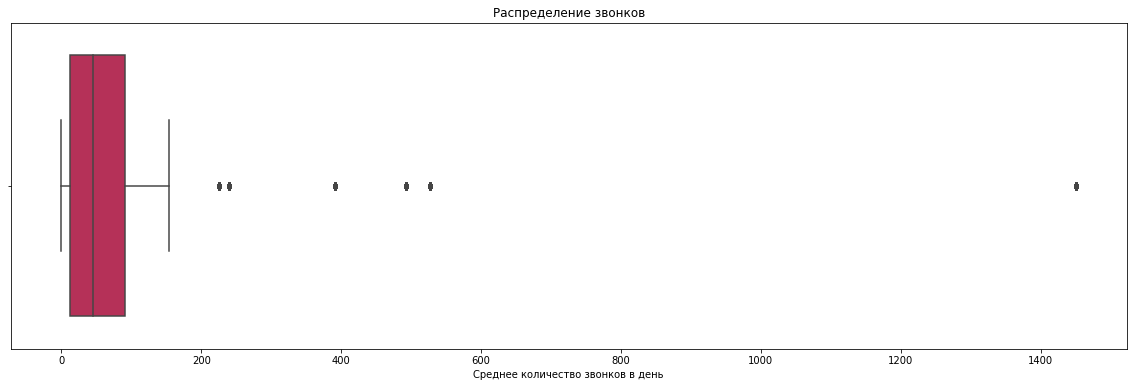

In [42]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='mean_call_count', data=active_user, palette="rocket")
plt.xlabel("Среднее количество звонков в день")
plt.title("Распределение звонков")
plt.show()

На диаграмме размаха видны выбросы в виде крайне высоких значений, однако в нашем случае это могут быть крупные клиенты с большим количеством операторов, поэтому на данном этапе мы удалять их не будем. вернемся к ним позже.
однако сейчас мы удалим неактивных клиентов с нулевым значением

In [43]:
#исключим неактивных клиентов
active_user = active_user.loc[active_user['mean_call_count'] != 0]
active_user

,user_id,lifetime,date,direction,internal,operator_id,is_missed_call,calls_count_x,call_duration,total_call_duration,tariff_plan,date_start,day_of_week,active_month,calls_count_y,mean_call_count
0,166377,119,2019-09-02,in,False,880028,False,2,66,75,B,2019-08-01,0,9,4172,35.058824
1,166377,119,2019-09-02,in,False,880026,False,1,31,34,B,2019-08-01,0,9,4172,35.058824
2,166377,119,2019-09-02,out,False,880026,False,16,1853,1983,B,2019-08-01,0,9,4172,35.058824
3,166377,119,2019-09-02,out,False,880026,True,6,0,168,B,2019-08-01,0,9,4172,35.058824
4,166377,119,2019-09-02,out,False,880028,False,20,2529,2687,B,2019-08-01,0,9,4172,35.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42866,168329,17,2019-11-07,in,False,0,True,1,0,2,B,2019-10-22,3,11,9,0.529412
42867,168329,17,2019-11-08,in,False,0,True,1,0,2,B,2019-10-22,4,11,9,0.529412
42868,168446,14,2019-10-28,in,False,0,True,3,0,1,B,2019-10-25,0,10,5,0.357143
42869,168446,14,2019-10-31,in,False,0,True,1,0,2,B,2019-10-25,3,10,5,0.357143


In [44]:
active_user['user_id'].nunique()

261

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Интересный подход к определению активных пользователей. Хорошо, что ты текстом подробно все поясняешь, так читателю легко следить за твоими рассуждениями.
</div>


In [45]:
active_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42871 entries, 0 to 42870
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              42871 non-null  int64         
 1   lifetime             42871 non-null  int64         
 2   date                 42871 non-null  datetime64[ns]
 3   direction            42871 non-null  object        
 4   internal             42871 non-null  bool          
 5   operator_id          42871 non-null  int64         
 6   is_missed_call       42871 non-null  bool          
 7   calls_count_x        42871 non-null  int64         
 8   call_duration        42871 non-null  int64         
 9   total_call_duration  42871 non-null  int64         
 10  tariff_plan          42871 non-null  object        
 11  date_start           42871 non-null  datetime64[ns]
 12  day_of_week          42871 non-null  int64         
 13  active_month         42871 non-

**Вывод**

- В нашем распоряжении данные за период с 2 августа по 28 ноября 2019 года (4 месяца)
- Прослеживается тенденция активных звонков в будние дни и минимум звонков в выходные
- В датасете включены только новые клиенты, зарегистрировавшиеся в системе в период с 1 августа по 31 октября 2019 года, поэтому такие низкие показатели в начале периода наблюдения. В среднем в день было зарегистрировано 4 новых клиента
- 41 пользователей из 303 (13%) не оформляли подписку на ноябрь 2019 года
- после удаления неактивных пользователей в нашем датафрейме осталось 261 клиент (86% )

### Составим портрет активного клиента

In [46]:
#изучим количество операторов у каждого клиента
operators_count = (active_user.groupby('user_id')
                   .agg({'operator_id': 'nunique'})
                   .sort_values(by='operator_id')
                   .rename(columns={'operator_id':'operator_id_count'})
                   .reset_index())
operators_count

,user_id,operator_id_count
0,168329,1
1,167265,1
2,168446,1
3,168459,1
4,167077,1
...,...,...
256,168361,28
257,168062,28
258,168252,29
259,167497,31


In [47]:
operators_count['operator_id_count'].value_counts()

2     88
3     55
4     32
5     22
6     14
1     12
7      8
8      6
16     4
9      4
28     2
17     2
12     2
10     2
15     1
13     1
11     1
18     1
22     1
29     1
31     1
51     1
Name: operator_id_count, dtype: int64

In [48]:
operators_count['operator_id_count'].describe()

count    261.000000
mean       4.609195
std        5.321993
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       51.000000
Name: operator_id_count, dtype: float64

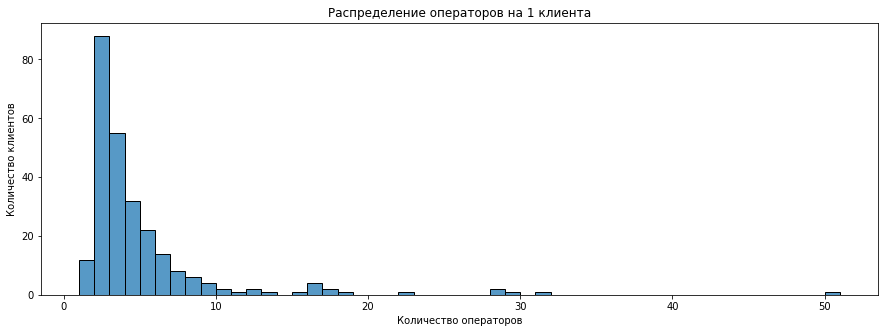

In [49]:
plt.figure(figsize=(15,5))
sns.histplot(data=operators_count, x="operator_id_count", bins = 50, palette = 'rocket')
plt.xlabel("Количество операторов")
plt.ylabel("Количество клиентов")
plt.title("Распределение операторов на 1 клиента")
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> 
 
Вопрос: возможно ли поменять в гистограмме цветовую палитру?
    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

По идее все верно в коде написано. Скорее всего в данной версии библиотеки еще не работает.

Есть более старомодный способ через color, вот так.
</div>

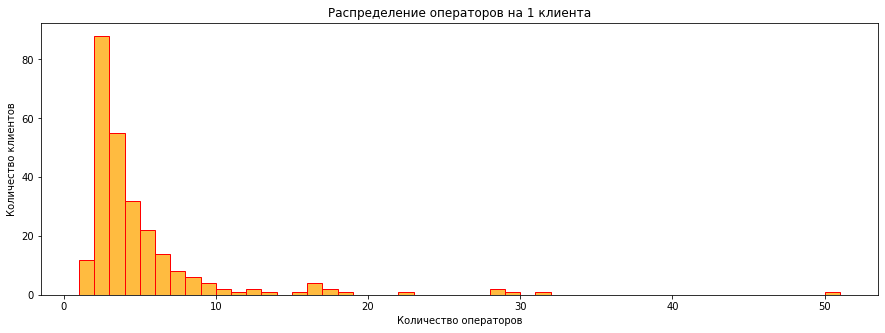

In [55]:
plt.figure(figsize=(15,5))
sns.histplot(data=operators_count, x="operator_id_count", bins = 50, color='orange', edgecolor='red')
plt.xlabel("Количество операторов")
plt.ylabel("Количество клиентов")
plt.title("Распределение операторов на 1 клиента")
plt.show()

Преимущественно наши клиенты имеют от 2 до 5 операторов, однако встречаются и крупные компании со штатом оператов свыше 20 человек (6 компаний)

In [50]:
#добавим количество операторов в основную таблицу

active_user = active_user.merge(operators_count, on='user_id', how='inner')
active_user

,user_id,lifetime,date,direction,internal,operator_id,is_missed_call,calls_count_x,call_duration,total_call_duration,tariff_plan,date_start,day_of_week,active_month,calls_count_y,mean_call_count,operator_id_count
0,166377,119,2019-09-02,in,False,880028,False,2,66,75,B,2019-08-01,0,9,4172,35.058824,6
1,166377,119,2019-09-02,in,False,880026,False,1,31,34,B,2019-08-01,0,9,4172,35.058824,6
2,166377,119,2019-09-02,out,False,880026,False,16,1853,1983,B,2019-08-01,0,9,4172,35.058824,6
3,166377,119,2019-09-02,out,False,880026,True,6,0,168,B,2019-08-01,0,9,4172,35.058824,6
4,166377,119,2019-09-02,out,False,880028,False,20,2529,2687,B,2019-08-01,0,9,4172,35.058824,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42866,168329,17,2019-11-07,in,False,0,True,1,0,2,B,2019-10-22,3,11,9,0.529412,1
42867,168329,17,2019-11-08,in,False,0,True,1,0,2,B,2019-10-22,4,11,9,0.529412,1
42868,168446,14,2019-10-28,in,False,0,True,3,0,1,B,2019-10-25,0,10,5,0.357143,1
42869,168446,14,2019-10-31,in,False,0,True,1,0,2,B,2019-10-25,3,10,5,0.357143,1


In [51]:
#соберем отдельную таблицу по активности операторов
operator_lifetime = (active_user
                     .pivot_table(index='operator_id',
                                 values='date',
                                 aggfunc=['first', 'last', 'nunique'])
                     .rename(columns={'date':''})
                     )
operator_lifetime.columns = [t[0] if t[0] else t[1] for t in operator_lifetime.columns]
operator_lifetime['lifetime'] = operator_lifetime['last'] - operator_lifetime['first']
operator_lifetime['lifetime'] = operator_lifetime['lifetime'].astype('str')
operator_lifetime['lifetime'] = operator_lifetime['lifetime'].str.replace(' days', '')
operator_lifetime['lifetime'] = operator_lifetime['lifetime'].astype('int')
operator_lifetime = operator_lifetime.sort_values(by ='lifetime', ascending=False)
operator_lifetime

,first,last,nunique,lifetime
operator_id,,,,
893402,2019-09-01,2019-11-28,72,88
882680,2019-09-01,2019-11-28,27,88
901034,2019-09-01,2019-11-28,16,88
899250,2019-09-01,2019-11-28,85,88
885876,2019-09-01,2019-11-28,76,88
...,...,...,...,...
941786,2019-10-23,2019-10-23,1,0
941816,2019-10-24,2019-10-24,1,0
955436,2019-11-20,2019-11-20,1,0


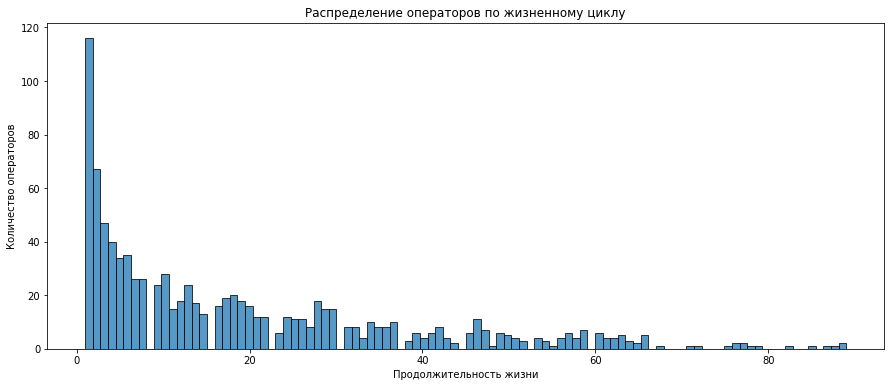

In [52]:
#построитм гистограмму для распределения лайфтайма операторов
plt.figure(figsize=(15,6))
sns.histplot(data=operator_lifetime, x="nunique", bins = 100, palette = 'rocket')
plt.xlabel("Продолжительность жизни")
plt.ylabel("Количество операторов")
plt.title("Распределение операторов по жизненному циклу")
plt.show()

Отметим большое количество операторов, имеющих менее 7 рабочих смен

In [53]:
#добавим информацию по временным показателям в основную таблицу по операторам
operator_info = active_user[['user_id', 'operator_id','date', 'direction', 'internal','is_missed_call', 'calls_count_x', 'call_duration', 'total_call_duration']]
operator_info=operator_info.merge(operator_lifetime, on ='operator_id', how='inner')
operator_info

,user_id,operator_id,date,direction,internal,is_missed_call,calls_count_x,call_duration,total_call_duration,first,last,nunique,lifetime
0,166377,880028,2019-09-02,in,False,False,2,66,75,2019-09-02,2019-11-28,61,87
1,166377,880028,2019-09-02,out,False,False,20,2529,2687,2019-09-02,2019-11-28,61,87
2,166377,880028,2019-09-02,out,False,True,29,0,1345,2019-09-02,2019-11-28,61,87
3,166377,880028,2019-09-03,out,False,False,17,1573,1733,2019-09-02,2019-11-28,61,87
4,166377,880028,2019-09-03,out,False,True,18,0,416,2019-09-02,2019-11-28,61,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42866,168606,957922,2019-11-09,out,False,False,4,551,593,2019-11-08,2019-11-15,5,7
42867,168606,957922,2019-11-10,out,True,False,1,0,25,2019-11-08,2019-11-15,5,7
42868,168606,957922,2019-11-10,out,True,True,1,0,38,2019-11-08,2019-11-15,5,7
42869,168606,957922,2019-11-11,out,True,False,2,479,501,2019-11-08,2019-11-15,5,7


In [54]:
#удалим операторов без рабочих дней в ноябре
operator_info = operator_info.loc[operator_info['last'] >= '2019-11-01']
operator_info

,user_id,operator_id,date,direction,internal,is_missed_call,calls_count_x,call_duration,total_call_duration,first,last,nunique,lifetime
0,166377,880028,2019-09-02,in,False,False,2,66,75,2019-09-02,2019-11-28,61,87
1,166377,880028,2019-09-02,out,False,False,20,2529,2687,2019-09-02,2019-11-28,61,87
2,166377,880028,2019-09-02,out,False,True,29,0,1345,2019-09-02,2019-11-28,61,87
3,166377,880028,2019-09-03,out,False,False,17,1573,1733,2019-09-02,2019-11-28,61,87
4,166377,880028,2019-09-03,out,False,True,18,0,416,2019-09-02,2019-11-28,61,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42866,168606,957922,2019-11-09,out,False,False,4,551,593,2019-11-08,2019-11-15,5,7
42867,168606,957922,2019-11-10,out,True,False,1,0,25,2019-11-08,2019-11-15,5,7
42868,168606,957922,2019-11-10,out,True,True,1,0,38,2019-11-08,2019-11-15,5,7
42869,168606,957922,2019-11-11,out,True,False,2,479,501,2019-11-08,2019-11-15,5,7


In [55]:
operator_info['operator_id'].nunique()

783

In [56]:
#выделим отдельную таблицу по активности операторов
operator_activity = (operator_info
                     .groupby(['user_id','operator_id', 'nunique'])[['calls_count_x', 'call_duration','total_call_duration']]
                     .agg('sum')
                     .sort_values(by='total_call_duration')
                     .reset_index())
operator_activity['total_call_duration_per_work_day'] = operator_activity['total_call_duration']/operator_activity['nunique']
operator_activity

,user_id,operator_id,nunique,calls_count_x,call_duration,total_call_duration,total_call_duration_per_work_day
0,166971,914626,1,1,0,0,0.000000
1,167580,960674,1,2,0,0,0.000000
2,168010,0,89,2,0,0,0.000000
3,168291,946454,2,13,0,0,0.000000
4,166939,955068,1,2,0,0,0.000000
...,...,...,...,...,...,...,...
1036,166511,891414,66,2718,233275,254118,3850.272727
1037,166511,891410,66,2907,263793,292936,4438.424242
1038,166983,901884,87,2549,283833,322350,3705.172414
1039,166782,893804,89,5722,274037,348502,3915.752809


In [57]:
operator_activity.describe()

,user_id,operator_id,nunique,calls_count_x,call_duration,total_call_duration,total_call_duration_per_work_day
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,167544.826129,699199.016330,38.247839,398.968300,18052.498559,24682.618636,823.304258
std,623.519918,403071.977204,33.556612,923.196332,37133.458560,46349.235147,1168.983850
min,166377.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,167004.000000,879898.000000,9.000000,15.000000,0.000000,492.000000,44.250000
50%,167575.000000,921062.000000,26.000000,77.000000,1970.000000,4150.000000,269.266667
75%,168091.000000,944226.000000,88.000000,346.000000,18694.000000,27518.000000,1122.900000
max,168606.000000,973286.000000,89.000000,17997.000000,400426.000000,449855.000000,6181.500000


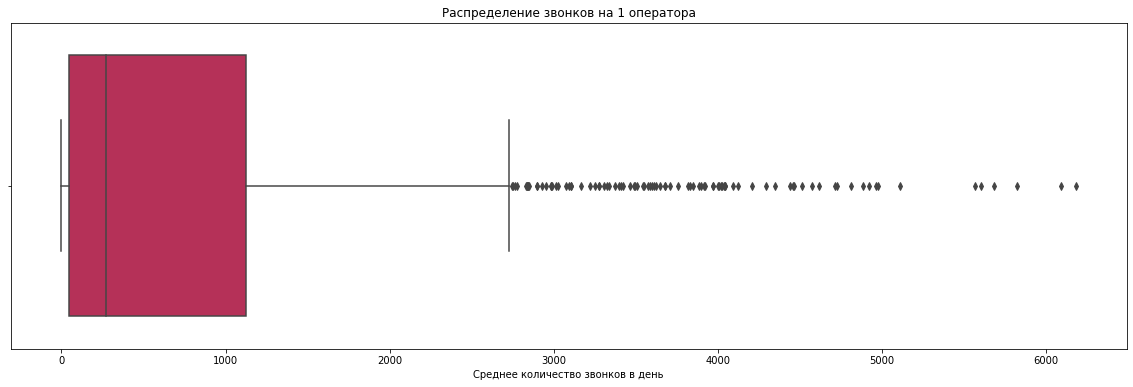

In [58]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='total_call_duration_per_work_day', data=operator_activity, palette="rocket")
plt.xlabel("Среднее количество звонков в день")
plt.title("Распределение звонков на 1 оператора")
plt.show()

In [59]:
#выделим из таблицы операторов, у которых общее количество часов равно нулю
#исключать операторов с большим количеством звонков нецелесообразно, т.к. есть вероятность, что под одним id работает несколько человек
operator_activity_1 = operator_activity.query('total_call_duration_per_work_day == 0')
operator_activity_1

,user_id,operator_id,nunique,calls_count_x,call_duration,total_call_duration,total_call_duration_per_work_day
0,166971,914626,1,1,0,0,0.0
1,167580,960674,1,2,0,0,0.0
2,168010,0,89,2,0,0,0.0
3,168291,946454,2,13,0,0,0.0
4,166939,955068,1,2,0,0,0.0
5,168091,958458,1,1,0,0,0.0


In [60]:
#проверим количество операторов с id равным 0 и средней продолжительностью смены равной 0
operator_activity.query('operator_id == 0 & total_call_duration_per_work_day == 0')

,user_id,operator_id,nunique,calls_count_x,call_duration,total_call_duration,total_call_duration_per_work_day
2,168010,0,89,2,0,0,0.0


In [61]:
#исключим 5 операторов из датафрейма
non_active_operator = [914626, 960674, 946454, 955068, 958458]
operator_activity = operator_activity.query('operator_id not in @non_active_operator')
operator_activity

,user_id,operator_id,nunique,calls_count_x,call_duration,total_call_duration,total_call_duration_per_work_day
2,168010,0,89,2,0,0,0.000000
6,167364,924572,1,1,0,1,1.000000
7,167981,0,89,1,0,2,0.022472
8,168578,0,89,1,0,2,0.022472
9,168490,0,89,2,0,2,0.022472
...,...,...,...,...,...,...,...
1036,166511,891414,66,2718,233275,254118,3850.272727
1037,166511,891410,66,2907,263793,292936,4438.424242
1038,166983,901884,87,2549,283833,322350,3705.172414
1039,166782,893804,89,5722,274037,348502,3915.752809


In [62]:
operator_activity['total_call_duration_per_work_day'].describe()

count    1036.000000
mean      827.277735
std      1170.399273
min         0.000000
25%        46.000000
50%       273.105392
75%      1125.778736
max      6181.500000
Name: total_call_duration_per_work_day, dtype: float64

In [63]:
#исключим 5 операторов из основного датафрейма

operator_info = operator_info.query('operator_id not in @non_active_operator')
operator_info

,user_id,operator_id,date,direction,internal,is_missed_call,calls_count_x,call_duration,total_call_duration,first,last,nunique,lifetime
0,166377,880028,2019-09-02,in,False,False,2,66,75,2019-09-02,2019-11-28,61,87
1,166377,880028,2019-09-02,out,False,False,20,2529,2687,2019-09-02,2019-11-28,61,87
2,166377,880028,2019-09-02,out,False,True,29,0,1345,2019-09-02,2019-11-28,61,87
3,166377,880028,2019-09-03,out,False,False,17,1573,1733,2019-09-02,2019-11-28,61,87
4,166377,880028,2019-09-03,out,False,True,18,0,416,2019-09-02,2019-11-28,61,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42866,168606,957922,2019-11-09,out,False,False,4,551,593,2019-11-08,2019-11-15,5,7
42867,168606,957922,2019-11-10,out,True,False,1,0,25,2019-11-08,2019-11-15,5,7
42868,168606,957922,2019-11-10,out,True,True,1,0,38,2019-11-08,2019-11-15,5,7
42869,168606,957922,2019-11-11,out,True,False,2,479,501,2019-11-08,2019-11-15,5,7


In [64]:
#исключим из датасета с активными клиентами операторов с нулевыми значениями звонков
active_operator = operator_info['operator_id']
active_user = active_user.query('operator_id in @active_operator')
active_user

,user_id,lifetime,date,direction,internal,operator_id,is_missed_call,calls_count_x,call_duration,total_call_duration,tariff_plan,date_start,day_of_week,active_month,calls_count_y,mean_call_count,operator_id_count
0,166377,119,2019-09-02,in,False,880028,False,2,66,75,B,2019-08-01,0,9,4172,35.058824,6
1,166377,119,2019-09-02,in,False,880026,False,1,31,34,B,2019-08-01,0,9,4172,35.058824,6
2,166377,119,2019-09-02,out,False,880026,False,16,1853,1983,B,2019-08-01,0,9,4172,35.058824,6
3,166377,119,2019-09-02,out,False,880026,True,6,0,168,B,2019-08-01,0,9,4172,35.058824,6
4,166377,119,2019-09-02,out,False,880028,False,20,2529,2687,B,2019-08-01,0,9,4172,35.058824,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42866,168329,17,2019-11-07,in,False,0,True,1,0,2,B,2019-10-22,3,11,9,0.529412,1
42867,168329,17,2019-11-08,in,False,0,True,1,0,2,B,2019-10-22,4,11,9,0.529412,1
42868,168446,14,2019-10-28,in,False,0,True,3,0,1,B,2019-10-25,0,10,5,0.357143,1
42869,168446,14,2019-10-31,in,False,0,True,1,0,2,B,2019-10-25,3,10,5,0.357143,1


In [65]:
#добавим столбец с указанием месяца активности
active_user['month'] = pd.to_datetime(active_user["date"]).dt.month
active_user

/tmp/ipykernel_101/3153882086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_user['month'] = pd.to_datetime(active_user["date"]).dt.month


,user_id,lifetime,date,direction,internal,operator_id,is_missed_call,calls_count_x,call_duration,total_call_duration,tariff_plan,date_start,day_of_week,active_month,calls_count_y,mean_call_count,operator_id_count,month
0,166377,119,2019-09-02,in,False,880028,False,2,66,75,B,2019-08-01,0,9,4172,35.058824,6,9
1,166377,119,2019-09-02,in,False,880026,False,1,31,34,B,2019-08-01,0,9,4172,35.058824,6,9
2,166377,119,2019-09-02,out,False,880026,False,16,1853,1983,B,2019-08-01,0,9,4172,35.058824,6,9
3,166377,119,2019-09-02,out,False,880026,True,6,0,168,B,2019-08-01,0,9,4172,35.058824,6,9
4,166377,119,2019-09-02,out,False,880028,False,20,2529,2687,B,2019-08-01,0,9,4172,35.058824,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42866,168329,17,2019-11-07,in,False,0,True,1,0,2,B,2019-10-22,3,11,9,0.529412,1,11
42867,168329,17,2019-11-08,in,False,0,True,1,0,2,B,2019-10-22,4,11,9,0.529412,1,11
42868,168446,14,2019-10-28,in,False,0,True,3,0,1,B,2019-10-25,0,10,5,0.357143,1,10
42869,168446,14,2019-10-31,in,False,0,True,1,0,2,B,2019-10-25,3,10,5,0.357143,1,10


In [66]:
# составим таблицу по клиентам в разрезе типа звонков
user_call_pivot = active_user.pivot_table(
    index=['user_id','month'],
    columns=['internal','direction'],
    values='total_call_duration',
    aggfunc=['sum']
).reset_index()
user_call_pivot.columns = ['user_id','month','external_in', 'external_out', 'internal_in', 'internal_out']

user_call_pivot.fillna(0, inplace=True)

user_call_pivot


,user_id,month,external_in,external_out,internal_in,internal_out
0,166377,9,1665.0,105071.0,0.0,9.0
1,166377,10,2740.0,99026.0,0.0,5.0
2,166377,11,2946.0,95384.0,0.0,127.0
3,166391,9,36.0,0.0,0.0,0.0
4,166391,10,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...
632,168583,11,1723.0,0.0,0.0,0.0
633,168598,11,4888.0,0.0,0.0,0.0
634,168601,11,9679.0,33192.0,0.0,0.0
635,168603,11,30.0,1187.0,0.0,0.0


In [67]:
#добавим столбец с типом клиента

user_call_pivot_1 = (user_call_pivot.groupby('user_id')[['external_in', 'external_out', 'internal_out', 'internal_in']]
                     .sum()
                     .reset_index())
user_call_pivot_1.columns = ['user_id','external_in', 'external_out', 'internal_in', 'internal_out']

user_call_pivot_1 ['client_type'] = ''

for i in range(len(user_call_pivot_1)): 
    if ((user_call_pivot_1.loc[i, 'external_in'] > user_call_pivot_1.loc[i, 'external_out']) 
        & (user_call_pivot_1.loc[i, 'external_in'] > user_call_pivot_1.loc[i, 'internal_in'])
        & (user_call_pivot_1.loc[i, 'external_in'] > user_call_pivot_1.loc[i, 'internal_out'])):
        user_call_pivot_1.at[i, 'client_type'] = 'external_in' 
    elif ((user_call_pivot_1.loc[i, 'external_out'] > user_call_pivot_1.loc[i, 'external_in'])
          & (user_call_pivot_1.loc[i, 'external_out'] > user_call_pivot_1.loc[i, 'internal_in'])
          & (user_call_pivot_1.loc[i, 'external_out'] > user_call_pivot_1.loc[i, 'internal_out'])):
        user_call_pivot_1.at[i, 'client_type'] = 'external_out'
    elif  ((user_call_pivot_1.loc[i, 'internal_in'] > user_call_pivot_1.loc[i, 'external_in'])
          & (user_call_pivot_1.loc[i, 'internal_in'] > user_call_pivot_1.loc[i, 'external_out'])
          & (user_call_pivot_1.loc[i, 'internal_in'] > user_call_pivot_1.loc[i, 'internal_out'])):
        user_call_pivot_1.at[i, 'client_type'] = 'internal_in'      
    else:
        user_call_pivot_1.at[i, 'client_type'] = 'internal_out'

user_call_pivot_1 = user_call_pivot_1[['user_id', 'client_type']]
user_call_pivot_1

,user_id,client_type
0,166377,external_out
1,166391,external_in
2,166392,external_in
3,166405,external_out
4,166406,external_out
...,...,...
256,168583,external_in
257,168598,external_in
258,168601,external_out
259,168603,external_out


In [68]:
#составим матрицу по месяцам и типам звонков
call_pivot = (active_user
                     .pivot_table(index = ['month', 'internal','direction'],
                                 values = 'total_call_duration',
                                 aggfunc = 'sum')
                     .reset_index())

call_pivot['call_type'] = ''

for i in range(len(call_pivot)): 
    if ((call_pivot.loc[i, 'internal'] == False) & (call_pivot.loc[i, 'direction'] == 'in')): 
        call_pivot.at[i, 'call_type'] = 'external_in' 
    elif ((call_pivot.loc[i, 'internal'] == False) & (call_pivot.loc[i, 'direction'] == 'out')):
        call_pivot.at[i, 'call_type'] = 'external_out'
    elif ((call_pivot.loc[i, 'internal'] == True) & (call_pivot.loc[i, 'direction'] == 'in')):
        call_pivot.at[i, 'call_type'] = 'internal_in'      
    else:
        call_pivot.at[i, 'call_type'] = 'internal_out'
          
call_pivot=call_pivot[['month', 'call_type', 'total_call_duration']]
call_pivot

,month,call_type,total_call_duration
0,9,external_in,1096074
1,9,external_out,2054728
2,9,internal_in,7013
3,9,internal_out,80405
4,10,external_in,3231437
5,10,external_out,4952232
6,10,internal_in,14444
7,10,internal_out,170254
8,11,external_in,4721555
9,11,external_out,8946006


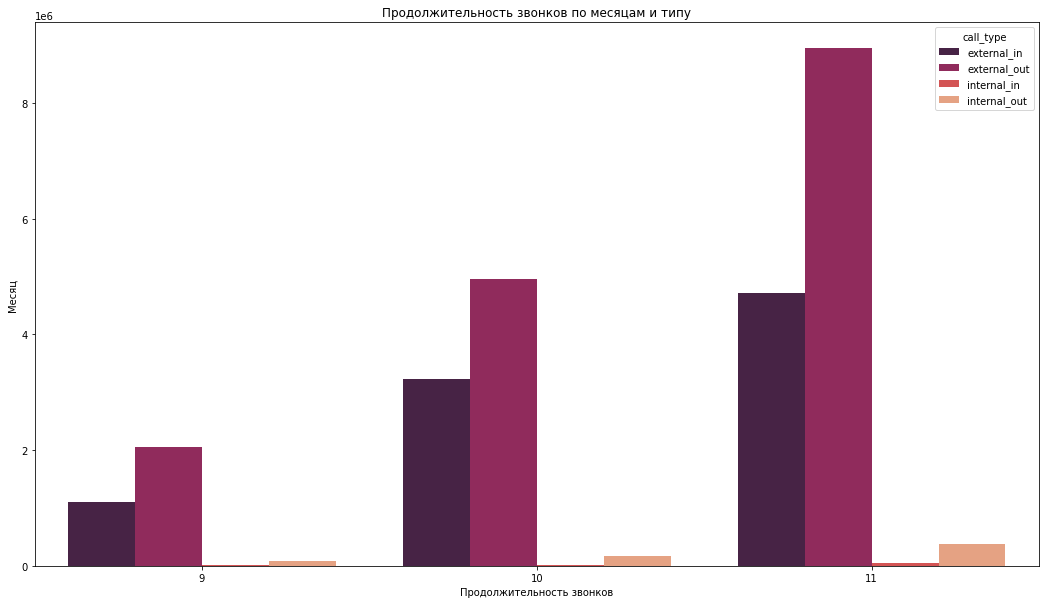

In [69]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='month', y='total_call_duration', hue='call_type', data=call_pivot, palette = 'rocket')
plt.title('Продолжительность звонков по месяцам и типу')
plt.xlabel('Продолжительность звонков')
plt.ylabel('Месяц')
plt.xticks(rotation=0)
plt.show()

Количество внешних исходящих звонков значительно превышает все остальные категории в каждом месяце (от 59% в октябре до 63% в сентябре и ноябре)

Количество внешних входящих звонков составляет порядка 35 % ежемесячно (33,8% в сентябре, 38,6% в октябре, 33,5% в ноябре)

Внутренние звонки не пользуются большой популярностью, преимущественно это внутренние исходящие звонки (2,5% ежемесячно)


In [70]:
user_call_pivot.describe()

,user_id,month,external_in,external_out,internal_in,internal_out
count,637.000000,637.000000,637.000000,6.370000e+02,637.000000,637.000000
mean,167376.100471,10.189953,14205.755102,2.504390e+04,113.315542,973.927786
std,597.396044,0.770950,37492.771290,7.771215e+04,1240.692659,5680.009226
min,166377.000000,9.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,166884.000000,10.000000,173.000000,0.000000e+00,0.000000,0.000000
50%,167275.000000,10.000000,1486.000000,6.450000e+02,0.000000,0.000000
75%,167923.000000,11.000000,9537.000000,1.920000e+04,0.000000,2.000000
max,168606.000000,11.000000,470148.000000,1.007028e+06,29507.000000,83569.000000


В описании значений по внутренним входящим звонкам 75% записей равны 0, при этом максимум зафиксирован на значении 29 507.
Схожая ситуация наблюдается среди внутренних исходящих: 3 квартиль отмечен на значении 2, при этом максимум зафиксирован на значении 83 569.  

Рассмотрим отдельно максимальные значения по этим типам звонков

In [71]:
user_call_pivot_int_in = user_call_pivot.query('internal_in > 1000')
user_call_pivot_int_in

,user_id,month,external_in,external_out,internal_in,internal_out
48,166541,9,59295.0,3283.0,1434.0,60.0
49,166541,10,89163.0,3407.0,1854.0,0.0
50,166541,11,69033.0,8021.0,1874.0,177.0
120,166732,9,378.0,0.0,2067.0,0.0
122,166732,11,920.0,12.0,3491.0,538.0
375,167497,11,29828.0,111141.0,6952.0,83569.0
566,168187,10,203996.0,254039.0,2549.0,1688.0
567,168187,11,470148.0,565525.0,29507.0,5113.0
579,168252,10,75706.0,33050.0,3916.0,1320.0
580,168252,11,312736.0,505597.0,3787.0,5852.0


Максимальные значения зафиксированы у наиболее крупных клиентов, все ок

In [72]:
user_call_pivot_int_out = user_call_pivot.query('internal_out > 1000')
user_call_pivot_int_out

,user_id,month,external_in,external_out,internal_in,internal_out
15,166407,9,3607.0,2350.0,608.0,5348.0
16,166407,10,7073.0,13074.0,105.0,9472.0
17,166407,11,2545.0,7395.0,0.0,7199.0
24,166485,9,23759.0,93139.0,0.0,9064.0
25,166485,10,41037.0,103901.0,0.0,18548.0
26,166485,11,29798.0,143190.0,0.0,13021.0
34,166503,10,15774.0,10879.0,612.0,1719.0
168,166901,9,13270.0,1923.0,0.0,5974.0
169,166901,10,15119.0,2945.0,0.0,4263.0
170,166901,11,12603.0,7923.0,0.0,4726.0


Интересный момент, исходящих внутренних звонков гораздо больше входящих.
Рабочая гипотеза, что это перераспределение звонков или звонки менеджеру. Для проверки этого предположения необходимо запросить дополнительные данные

In [73]:
#сделаем срез по количеству операторов среди клиентов разных тарифных планов
operators_per_client = active_user[['user_id','operator_id_count', 'tariff_plan']]
operators_per_client = operators_per_client.drop_duplicates().reset_index(drop=True)
operators_per_client

,user_id,operator_id_count,tariff_plan
0,166377,6,B
1,166392,3,C
2,166405,11,B
3,166406,3,B
4,166407,9,A
...,...,...,...
256,168202,2,C
257,168578,1,B
258,168606,2,C
259,168329,1,B


In [74]:
#для дальнейшей работы с тарифными планами сведем в одну таблицу информацию по клиентам, операторам с указанием тарифных планов
user_call_pivot = user_call_pivot.merge(user_call_pivot_1, on='user_id', how='left') 
user_call_pivot = user_call_pivot.merge(operators_per_client, on='user_id', how='left')
user_call_pivot

,user_id,month,external_in,external_out,internal_in,internal_out,client_type,operator_id_count,tariff_plan
0,166377,9,1665.0,105071.0,0.0,9.0,external_out,6,B
1,166377,10,2740.0,99026.0,0.0,5.0,external_out,6,B
2,166377,11,2946.0,95384.0,0.0,127.0,external_out,6,B
3,166391,9,36.0,0.0,0.0,0.0,external_in,2,C
4,166391,10,2.0,0.0,0.0,0.0,external_in,2,C
...,...,...,...,...,...,...,...,...,...
632,168583,11,1723.0,0.0,0.0,0.0,external_in,3,B
633,168598,11,4888.0,0.0,0.0,0.0,external_in,2,C
634,168601,11,9679.0,33192.0,0.0,0.0,external_out,3,C
635,168603,11,30.0,1187.0,0.0,0.0,external_out,2,B


In [75]:
#проверим количество клиентов разных типов на каждом тарифе
tariff_by_client_type = (user_call_pivot
                         .pivot_table(index = ['tariff_plan','client_type'],
                                      values = 'user_id',
                                      aggfunc = 'nunique')
                     .reset_index())

tariff_by_client_type

,tariff_plan,client_type,user_id
0,A,external_in,11
1,A,external_out,19
2,B,external_in,51
3,B,external_out,44
4,B,internal_out,1
5,C,external_in,91
6,C,external_out,42
7,C,internal_in,2


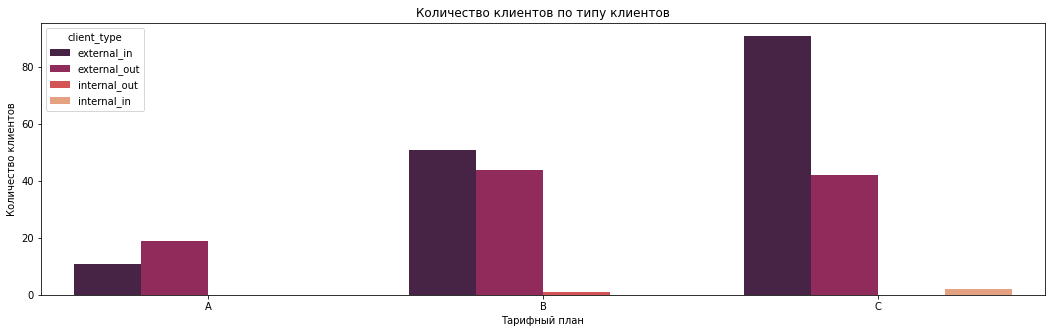

In [76]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='tariff_plan', y='user_id', hue='client_type', data=tariff_by_client_type, palette = 'rocket')
plt.title('Количество клиентов по типу клиентов')
plt.xlabel('Тарифный план')
plt.ylabel('Количество клиентов')
plt.show()

На тарифном плане А преобладают клиенты категории "колл-центр" (преимущественно внешние исходящие звонки)

Тариф план В и С характеризуется большим количеством клиентов "службы поддержки" (преимущестенно внешние входящие звонки)

**Краткие выводы:**

- Преимущественно наши клиенты имеют от 1 до 7 операторов, однако встречаются и крупные компании со штатом оператов свыше 20 человек (6 компаний)
- 783 оператора (83%) работали в ноябре,  среди них выявлено и удалено 7 аномальных id

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Да, все верно. Здесь важно отметить, что в основном у клиентов по 1-2 оператора. Значит, скорее всего, один аккаунт используется для нескольких человек, возможно и одновременно. Т.е. фильтровать время по суткам не получится, стоит делать это именно по выбросам в наших данных.
</div>


### Составим картину тарифных планов

In [77]:
#определим количество клиентов на каждом тарифном плане
client_by_tariff = (user_call_pivot
                    .pivot_table(index = ['tariff_plan', 'month'],
                                 values = 'user_id',
                                 aggfunc = 'nunique')
                    .reset_index())
client_by_tariff

,tariff_plan,month,user_id
0,A,9,16
1,A,10,29
2,A,11,30
3,B,9,56
4,B,10,83
5,B,11,96
6,C,9,68
7,C,10,124
8,C,11,135


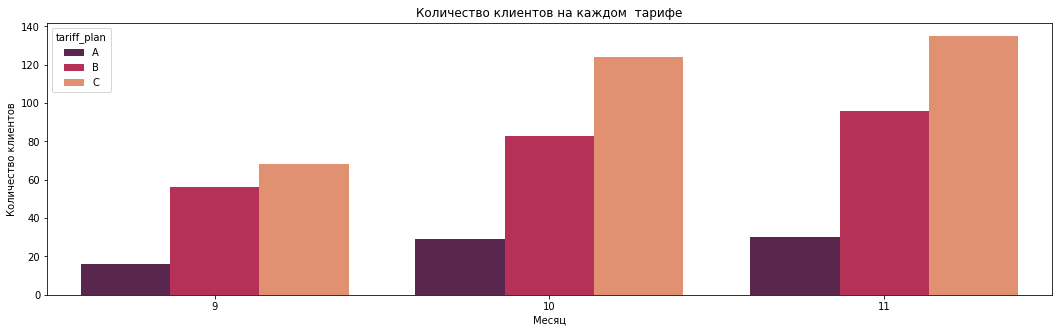

In [78]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='month', y='user_id', hue = 'tariff_plan', data=client_by_tariff, palette = 'rocket')
plt.title('Количество клиентов на каждом  тарифе')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.show()

Самый популярный ***тариф С***: на нем зарегистрировано 135 клиентов (52%),  
на ***тарифе В*** - 96 клиентов (37%)  
и ***тариф А*** с наименьшим количеством клиентов - 30 человек (11%)

In [79]:
#опеределим медианное значение количества операторов у одного клиента
user_call_pivot_short = user_call_pivot[['user_id','operator_id_count','tariff_plan']]
user_call_pivot_short= user_call_pivot_short.drop_duplicates().reset_index(drop=True)
operator_by_tariff = (user_call_pivot_short
                    .pivot_table(index = ['tariff_plan'],
                                 values = 'operator_id_count',
                                 aggfunc = 'median')
                    .reset_index())
operator_by_tariff

,tariff_plan,operator_id_count
0,A,4.5
1,B,3.5
2,C,3.0


Самые крупные клиенты подключают тариф А, среди них медианное значение количества операторов более 4 человек (при этом ранее мы определили, что в среднем у наших клиентов в штате до 3 операторов)

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Давай здесь и далее для таблиц будем текстом подписывать, что мы в них отображаем иначе большая часть проекта остается не понятной, нужно из кода понимать, что ты выводишь, а это принципиально не верный подход.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
 
Добавила комментарии
    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

+

</div>

In [80]:
#переведем информацию по тарифным планам в цифровой формат
tariffs = pd.DataFrame({'tariff_plan': ['A', 'B', 'C'], 
                      'internal_limit_min': [2000, 500 ,0],
                     'month_cost': [4000, 2000, 1000], 
                     'internal_cost': [0.1, 0.15, 0.3], 
                     'not_internal_cost': [0.3, 0.5, 0.7], 
                     'operator_cost': [50, 150, 300]})
tariffs

,tariff_plan,internal_limit_min,month_cost,internal_cost,not_internal_cost,operator_cost
0,A,2000,4000,0.10,0.3,50
1,B,500,2000,0.15,0.5,150
2,C,0,1000,0.30,0.7,300


In [81]:
#добавим составляющие тарифного плана в основную таблицу с клиентами
user_call_pivot = user_call_pivot.merge(tariffs, on='tariff_plan', how='left')
user_call_pivot

,user_id,month,external_in,external_out,internal_in,internal_out,client_type,operator_id_count,tariff_plan,internal_limit_min,month_cost,internal_cost,not_internal_cost,operator_cost
0,166377,9,1665.0,105071.0,0.0,9.0,external_out,6,B,500,2000,0.15,0.5,150
1,166377,10,2740.0,99026.0,0.0,5.0,external_out,6,B,500,2000,0.15,0.5,150
2,166377,11,2946.0,95384.0,0.0,127.0,external_out,6,B,500,2000,0.15,0.5,150
3,166391,9,36.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300
4,166391,10,2.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,168583,11,1723.0,0.0,0.0,0.0,external_in,3,B,500,2000,0.15,0.5,150
633,168598,11,4888.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300
634,168601,11,9679.0,33192.0,0.0,0.0,external_out,3,C,0,1000,0.30,0.7,300
635,168603,11,30.0,1187.0,0.0,0.0,external_out,2,B,500,2000,0.15,0.5,150


In [82]:
#добавим столбец с превышением лимита минут по внутренним звонкам
user_call_pivot['over_internal_limit'] = user_call_pivot['internal_out']-user_call_pivot['internal_limit_min']

#заменим отрицательные значения в новом столбце на 0, поскольку эти клиенты уложились в лимит, а неиспользованные минуты нас не интересуют
for col in user_call_pivot.columns:
    user_call_pivot['over_internal_limit'] = np.where(user_call_pivot['over_internal_limit']>0, user_call_pivot['over_internal_limit'], 0)
    
user_call_pivot

,user_id,month,external_in,external_out,internal_in,internal_out,client_type,operator_id_count,tariff_plan,internal_limit_min,month_cost,internal_cost,not_internal_cost,operator_cost,over_internal_limit
0,166377,9,1665.0,105071.0,0.0,9.0,external_out,6,B,500,2000,0.15,0.5,150,0.0
1,166377,10,2740.0,99026.0,0.0,5.0,external_out,6,B,500,2000,0.15,0.5,150,0.0
2,166377,11,2946.0,95384.0,0.0,127.0,external_out,6,B,500,2000,0.15,0.5,150,0.0
3,166391,9,36.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300,0.0
4,166391,10,2.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,168583,11,1723.0,0.0,0.0,0.0,external_in,3,B,500,2000,0.15,0.5,150,0.0
633,168598,11,4888.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300,0.0
634,168601,11,9679.0,33192.0,0.0,0.0,external_out,3,C,0,1000,0.30,0.7,300,0.0
635,168603,11,30.0,1187.0,0.0,0.0,external_out,2,B,500,2000,0.15,0.5,150,0.0


In [83]:
#рассчитаем итоговую сумму платежа за каждый месяц по клиенту
user_call_pivot['revenue'] = (user_call_pivot['month_cost'] +
                              user_call_pivot['over_internal_limit'] * user_call_pivot['internal_cost'] + 
                              user_call_pivot['external_out'] * user_call_pivot['not_internal_cost'] +
                              user_call_pivot['operator_id_count'] * user_call_pivot['operator_cost'])
user_call_pivot

,user_id,month,external_in,external_out,internal_in,internal_out,client_type,operator_id_count,tariff_plan,internal_limit_min,month_cost,internal_cost,not_internal_cost,operator_cost,over_internal_limit,revenue
0,166377,9,1665.0,105071.0,0.0,9.0,external_out,6,B,500,2000,0.15,0.5,150,0.0,55435.5
1,166377,10,2740.0,99026.0,0.0,5.0,external_out,6,B,500,2000,0.15,0.5,150,0.0,52413.0
2,166377,11,2946.0,95384.0,0.0,127.0,external_out,6,B,500,2000,0.15,0.5,150,0.0,50592.0
3,166391,9,36.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300,0.0,1600.0
4,166391,10,2.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300,0.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,168583,11,1723.0,0.0,0.0,0.0,external_in,3,B,500,2000,0.15,0.5,150,0.0,2450.0
633,168598,11,4888.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300,0.0,1600.0
634,168601,11,9679.0,33192.0,0.0,0.0,external_out,3,C,0,1000,0.30,0.7,300,0.0,25134.4
635,168603,11,30.0,1187.0,0.0,0.0,external_out,2,B,500,2000,0.15,0.5,150,0.0,2893.5


In [84]:
#помесячная выручка с каждого тарифа
month_revenue = (user_call_pivot
                 .pivot_table (index = ['month','tariff_plan'],
                              values = 'revenue',
                              aggfunc = sum)
                 .reset_index())
month_revenue

,month,tariff_plan,revenue
0,9,A,86310.30
1,9,B,687222.55
2,9,C,818537.00
3,10,A,417160.60
4,10,B,1204723.60
5,10,C,1717723.40
6,11,A,1266425.10
7,11,B,1656081.35
8,11,C,2023133.40


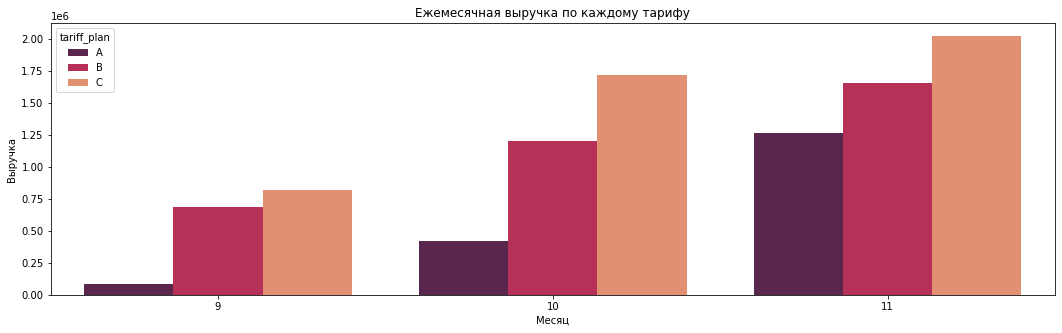

In [85]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='month', y='revenue', hue='tariff_plan', data=month_revenue, palette = 'rocket')
plt.title('Ежемесячная выручка по каждому тарифу')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

Наибольшую выручку нам приносят клиенты тарифа С, однако и количество клиентов на этом тарифе гораздо выше А и В.

Посмотрим, среднюю выручку на 1 клиента на каждом тарифном плане

In [86]:
#средняя выручка в месяц на 1 клиента тарифного плана
month_revenue_per_client = (user_call_pivot
                 .pivot_table (index = ['month','tariff_plan'],
                              values = ['user_id', 'revenue'],
                              aggfunc = {'user_id':'nunique', 'revenue': 'sum'})
                 .reset_index())
month_revenue_per_client['mean_revenue'] = month_revenue_per_client['revenue']/month_revenue_per_client['user_id']
month_revenue_per_client

,month,tariff_plan,revenue,user_id,mean_revenue
0,9,A,86310.30,16,5394.393750
1,9,B,687222.55,56,12271.831250
2,9,C,818537.00,68,12037.308824
3,10,A,417160.60,29,14384.848276
4,10,B,1204723.60,83,14514.742169
5,10,C,1717723.40,124,13852.608065
6,11,A,1266425.10,30,42214.170000
7,11,B,1656081.35,96,17250.847396
8,11,C,2023133.40,135,14986.173333


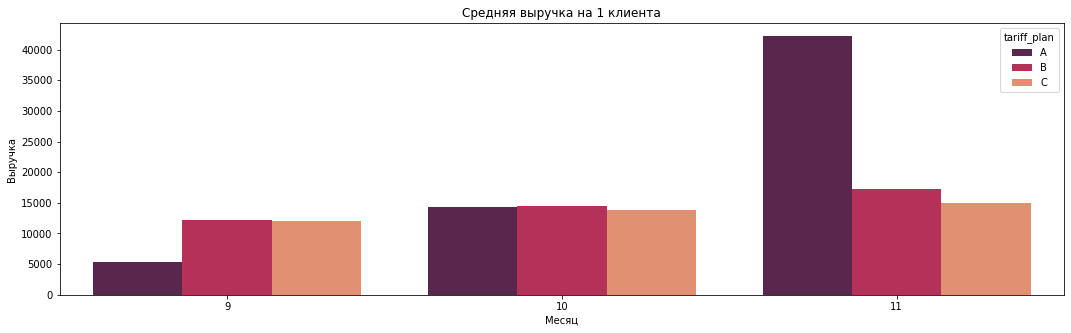

In [87]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='month', y='mean_revenue', hue='tariff_plan', data=month_revenue_per_client, palette = 'rocket')
plt.title('Средняя выручка на 1 клиента')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

Выручка от клиентов тарифа А в течение 3 месяцев стремительно росла (почти в 8 раз).

Выручка от клиентов тарифов В и С так же показывает рост, однако горазно более плавный:  
тариф В - с 12,2 тыс до 17,3 тыс (+40%)  
тариф С - 12,0 тыс до 15,0 тыс (+25%)


In [88]:
# посмотрим по каким составляющим тарифного плана происходит рост выручки
tariff_component = user_call_pivot[['user_id','month', 'external_in', 'external_out', 'internal_in', 'internal_out', 
                                    'client_type', 'operator_id_count', 'tariff_plan', 'internal_limit_min',
                                   'internal_cost', 'not_internal_cost', 'operator_cost', 'over_internal_limit']]

tariff_component['revenue_over_internal_limit'] =  tariff_component['over_internal_limit'] * tariff_component['internal_cost']
tariff_component['revenue_external_out'] = tariff_component['external_out'] * tariff_component['not_internal_cost']
tariff_component['revenue_operator'] = tariff_component['operator_id_count'] * tariff_component['operator_cost']

tariff_component = tariff_component[['user_id','month','client_type', 'tariff_plan', 'revenue_over_internal_limit',
                                    'revenue_external_out', 'revenue_operator']]

tariff_component


/tmp/ipykernel_101/4230070731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariff_component['revenue_over_internal_limit'] =  tariff_component['over_internal_limit'] * tariff_component['internal_cost']


,user_id,month,client_type,tariff_plan,revenue_over_internal_limit,revenue_external_out,revenue_operator
0,166377,9,external_out,B,0.0,52535.5,900
1,166377,10,external_out,B,0.0,49513.0,900
2,166377,11,external_out,B,0.0,47692.0,900
3,166391,9,external_in,C,0.0,0.0,600
4,166391,10,external_in,C,0.0,0.0,600
...,...,...,...,...,...,...,...
632,168583,11,external_in,B,0.0,0.0,450
633,168598,11,external_in,C,0.0,0.0,600
634,168601,11,external_out,C,0.0,23234.4,900
635,168603,11,external_out,B,0.0,593.5,300


In [89]:
month_revenue_per_components = (tariff_component
                                .groupby(['month','tariff_plan'])
                                ['user_id','revenue_over_internal_limit', 'revenue_external_out', 'revenue_operator']
                                .agg({'user_id': 'nunique', 
                                      'revenue_over_internal_limit':'sum',
                                      'revenue_external_out':'sum',
                                      'revenue_operator':'sum'})
                                .reset_index())

month_revenue_per_components['revenue_over_internal_limit_per_client'] = (month_revenue_per_components['revenue_over_internal_limit']
                                                                    /month_revenue_per_components['user_id'])
month_revenue_per_components['revenue_external_out_per_client'] = (month_revenue_per_components['revenue_external_out']
                                                                    /month_revenue_per_components['user_id'])
month_revenue_per_components['revenue_operator_per_client']= (month_revenue_per_components['revenue_operator']
                                                                    /month_revenue_per_components['user_id'])
month_revenue_per_components

/tmp/ipykernel_101/2650693084.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  month_revenue_per_components = (tariff_component


,month,tariff_plan,user_id,revenue_over_internal_limit,revenue_external_out,revenue_operator,revenue_over_internal_limit_per_client,revenue_external_out_per_client,revenue_operator_per_client
0,9,A,16,844.20,16166.1,5300,52.762500,1010.381250,331.250000
1,9,B,56,4066.05,524806.5,46350,72.608036,9371.544643,827.678571
2,9,C,68,10877.40,665859.6,73800,159.961765,9792.052941,1085.294118
3,10,A,29,4553.90,282356.7,14250,157.031034,9736.437931,491.379310
4,10,B,83,8906.10,968917.5,60900,107.302410,11673.704819,733.734940
5,10,C,124,13777.80,1451245.6,128700,111.111290,11703.593548,1037.903226
6,11,A,30,20395.00,1111730.1,14300,679.833333,37057.670000,476.666667
7,11,B,96,13678.35,1382303.0,68100,142.482812,14398.989583,709.375000
8,11,C,135,16290.30,1732943.1,138900,120.668889,12836.615556,1028.888889


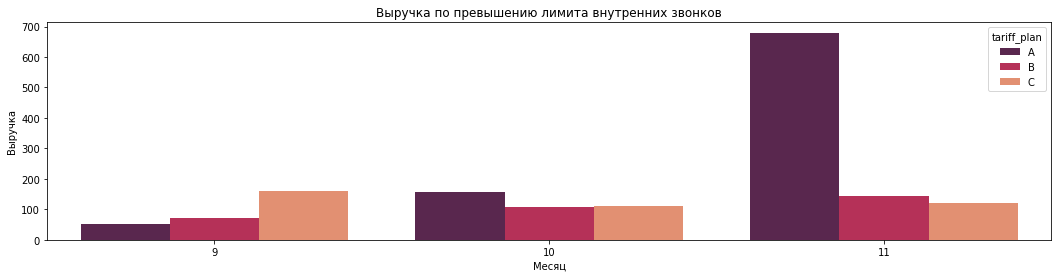

In [90]:
plt.figure(figsize=(18, 4))
ax = sns.barplot(x='month', y='revenue_over_internal_limit_per_client', hue='tariff_plan', data=month_revenue_per_components, palette = 'rocket')
plt.title('Выручка по превышению лимита внутренних звонков')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

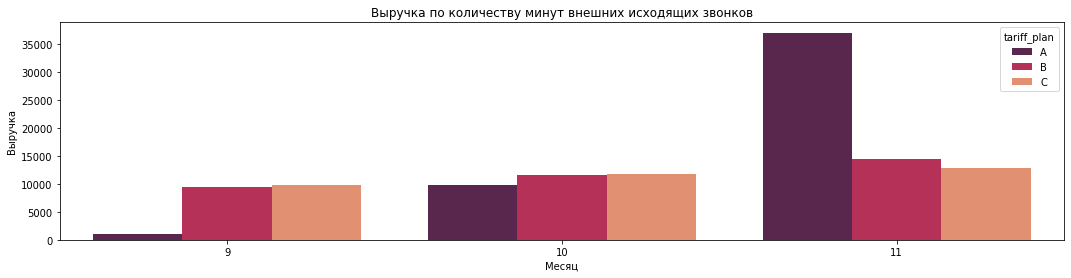

In [91]:
plt.figure(figsize=(18, 4))
ax = sns.barplot(x='month', y='revenue_external_out_per_client', hue='tariff_plan', data=month_revenue_per_components, palette = 'rocket')
plt.title('Выручка по количеству минут внешних исходящих звонков')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

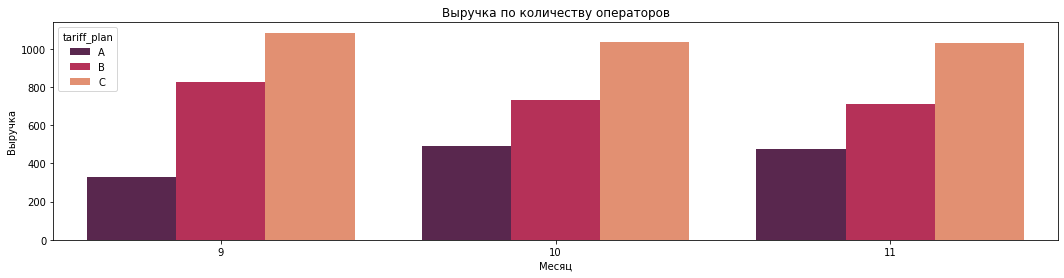

In [92]:
plt.figure(figsize=(18, 4))
ax = sns.barplot(x='month', y='revenue_operator_per_client', hue='tariff_plan', data=month_revenue_per_components, palette = 'rocket')
plt.title('Выручка по количеству операторов')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

У клиентов тарифа А в ноябре 2019 г наблюдается резкий рост переплаты за превышение литита внутренних звонков (в 13 раз) и выручки за исходящие внешние звонки (в 37 раз) при этом среди клиентов других тарифов таких всплском не наблюдается.
Вероятно, такая картина связана с некорректным выбором тарифа для крупных клиентов

In [93]:
#рассчитаем для каждого клиента затраты на каждом тарифе
user_call_pivot['A_hypo_revenue'] = (4000 + 
                                     user_call_pivot['over_internal_limit'] * 0.1 + 
                                     user_call_pivot['external_out'] * 0.3 +
                                     user_call_pivot['operator_id_count'] * 50)
user_call_pivot['B_hypo_revenue'] = (2000+
                                     user_call_pivot['over_internal_limit'] * 0.15 + 
                                     user_call_pivot['external_out'] * 0.5 +
                                     user_call_pivot['operator_id_count'] * 150)
user_call_pivot['C_hypo_revenue'] = (1000+
                                     user_call_pivot['over_internal_limit'] * 0.3 + 
                                     user_call_pivot['external_out'] * 0.7 +
                                     user_call_pivot['operator_id_count'] * 300)
user_call_pivot

,user_id,month,external_in,external_out,internal_in,internal_out,client_type,operator_id_count,tariff_plan,internal_limit_min,month_cost,internal_cost,not_internal_cost,operator_cost,over_internal_limit,revenue,A_hypo_revenue,B_hypo_revenue,C_hypo_revenue
0,166377,9,1665.0,105071.0,0.0,9.0,external_out,6,B,500,2000,0.15,0.5,150,0.0,55435.5,35821.3,55435.5,76349.7
1,166377,10,2740.0,99026.0,0.0,5.0,external_out,6,B,500,2000,0.15,0.5,150,0.0,52413.0,34007.8,52413.0,72118.2
2,166377,11,2946.0,95384.0,0.0,127.0,external_out,6,B,500,2000,0.15,0.5,150,0.0,50592.0,32915.2,50592.0,69568.8
3,166391,9,36.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300,0.0,1600.0,4100.0,2300.0,1600.0
4,166391,10,2.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300,0.0,1600.0,4100.0,2300.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,168583,11,1723.0,0.0,0.0,0.0,external_in,3,B,500,2000,0.15,0.5,150,0.0,2450.0,4150.0,2450.0,1900.0
633,168598,11,4888.0,0.0,0.0,0.0,external_in,2,C,0,1000,0.30,0.7,300,0.0,1600.0,4100.0,2300.0,1600.0
634,168601,11,9679.0,33192.0,0.0,0.0,external_out,3,C,0,1000,0.30,0.7,300,0.0,25134.4,14107.6,19046.0,25134.4
635,168603,11,30.0,1187.0,0.0,0.0,external_out,2,B,500,2000,0.15,0.5,150,0.0,2893.5,4456.1,2893.5,2430.9


In [94]:
#сделаем выжимку из основной таблицы
df_tariff = user_call_pivot[['user_id','month', 'tariff_plan','revenue','A_hypo_revenue', 'B_hypo_revenue', 'C_hypo_revenue']]
df_tariff

,user_id,month,tariff_plan,revenue,A_hypo_revenue,B_hypo_revenue,C_hypo_revenue
0,166377,9,B,55435.5,35821.3,55435.5,76349.7
1,166377,10,B,52413.0,34007.8,52413.0,72118.2
2,166377,11,B,50592.0,32915.2,50592.0,69568.8
3,166391,9,C,1600.0,4100.0,2300.0,1600.0
4,166391,10,C,1600.0,4100.0,2300.0,1600.0
...,...,...,...,...,...,...,...
632,168583,11,B,2450.0,4150.0,2450.0,1900.0
633,168598,11,C,1600.0,4100.0,2300.0,1600.0
634,168601,11,C,25134.4,14107.6,19046.0,25134.4
635,168603,11,B,2893.5,4456.1,2893.5,2430.9


In [95]:
#добавим столбец с оптимальным тарифом для каждого клиента
df_tariff['optimal_tariff'] = '' 
for i in range(len(df_tariff)): 
    if ((df_tariff.loc[i, 'A_hypo_revenue'] < df_tariff.loc[i,'B_hypo_revenue']) & (df_tariff.loc[i, 'A_hypo_revenue'] < df_tariff.loc[i,'C_hypo_revenue'])): 
        df_tariff.at[i, 'optimal_tariff'] = 'A' 
    elif ((df_tariff.loc[i, 'B_hypo_revenue'] < df_tariff.loc[i,'A_hypo_revenue']) & (df_tariff.loc[i, 'B_hypo_revenue'] < df_tariff.loc[i,'C_hypo_revenue'])):
        df_tariff.at[i, 'optimal_tariff'] = 'B'
    else:
        df_tariff.at[i, 'optimal_tariff'] = 'C' 
        
df_tariff

/tmp/ipykernel_101/4183107386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tariff['optimal_tariff'] = ''


,user_id,month,tariff_plan,revenue,A_hypo_revenue,B_hypo_revenue,C_hypo_revenue,optimal_tariff
0,166377,9,B,55435.5,35821.3,55435.5,76349.7,A
1,166377,10,B,52413.0,34007.8,52413.0,72118.2,A
2,166377,11,B,50592.0,32915.2,50592.0,69568.8,A
3,166391,9,C,1600.0,4100.0,2300.0,1600.0,C
4,166391,10,C,1600.0,4100.0,2300.0,1600.0,C
...,...,...,...,...,...,...,...,...
632,168583,11,B,2450.0,4150.0,2450.0,1900.0,C
633,168598,11,C,1600.0,4100.0,2300.0,1600.0,C
634,168601,11,C,25134.4,14107.6,19046.0,25134.4,A
635,168603,11,B,2893.5,4456.1,2893.5,2430.9,C


In [96]:
#проверим на наличие разных оптимальных тарифов в разных месяцах
double_tariff = df_tariff.groupby('user_id')['optimal_tariff'].nunique().reset_index()
double_tariff=double_tariff.query('optimal_tariff > 1')
len(double_tariff)

63

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Определить активных клиентов - это хорошо. Но весь анализ (ответ на главный вопрос) строить только на ноябре - это не правильно. получается мы 3/4 данных просто исключаем из рассмотрения... Давай на более полных данных проведем расчеты и получим результаты.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
 
Скорректировала
    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо
</div>

In [97]:
#добавим критерий "оптимальный-неоптимальный тариф"
def custom_func(row):
    if row['optimal_tariff'] != row['tariff_plan']:
        return 'Выявлен неоптимальный тариф'
    else:
        return 'OK'

df_tariff['allarm'] = df_tariff.apply(custom_func, axis=1)
df_tariff

/tmp/ipykernel_101/1033565769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tariff['allarm'] = df_tariff.apply(custom_func, axis=1)


,user_id,month,tariff_plan,revenue,A_hypo_revenue,B_hypo_revenue,C_hypo_revenue,optimal_tariff,allarm
0,166377,9,B,55435.5,35821.3,55435.5,76349.7,A,Выявлен неоптимальный тариф
1,166377,10,B,52413.0,34007.8,52413.0,72118.2,A,Выявлен неоптимальный тариф
2,166377,11,B,50592.0,32915.2,50592.0,69568.8,A,Выявлен неоптимальный тариф
3,166391,9,C,1600.0,4100.0,2300.0,1600.0,C,OK
4,166391,10,C,1600.0,4100.0,2300.0,1600.0,C,OK
...,...,...,...,...,...,...,...,...,...
632,168583,11,B,2450.0,4150.0,2450.0,1900.0,C,Выявлен неоптимальный тариф
633,168598,11,C,1600.0,4100.0,2300.0,1600.0,C,OK
634,168601,11,C,25134.4,14107.6,19046.0,25134.4,A,Выявлен неоптимальный тариф
635,168603,11,B,2893.5,4456.1,2893.5,2430.9,C,Выявлен неоптимальный тариф


In [98]:
non_optimal_tariff = (df_tariff.pivot_table(index = ['month', 'allarm'],
                               values = 'user_id',
                               aggfunc = 'nunique')
                       .reset_index())
non_optimal_tariff

,month,allarm,user_id
0,9,OK,57
1,9,Выявлен неоптимальный тариф,83
2,10,OK,112
3,10,Выявлен неоптимальный тариф,124
4,11,OK,109
5,11,Выявлен неоптимальный тариф,152


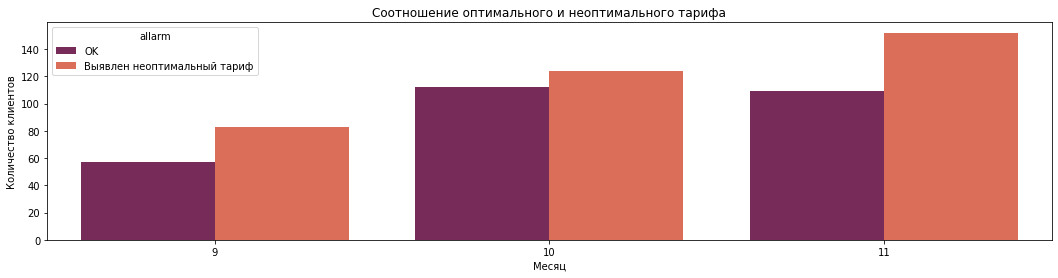

In [99]:
#посмотрим на диаграмме распределение неоптимального тарифа
plt.figure(figsize=(18, 4))
ax = sns.barplot(x='month', y='user_id', hue = 'allarm', data=non_optimal_tariff, palette = 'rocket')
plt.title('Соотношение оптимального и неоптимального тарифа')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.show()

In [100]:
non_optimal_tariff_1 = (df_tariff.pivot_table(index = 'month',
                               columns = 'allarm',
                               values = 'user_id',
                               aggfunc = 'nunique')
                       .reset_index())
non_optimal_tariff_1.columns = ['month', 'ok', 'non_optimal']
non_optimal_tariff_1['non_optimal_part'] = non_optimal_tariff_1['non_optimal']/ (non_optimal_tariff_1['ok'] + non_optimal_tariff_1['non_optimal'])
non_optimal_tariff_1

,month,ok,non_optimal,non_optimal_part
0,9,57,83,0.592857
1,10,112,124,0.525424
2,11,109,152,0.582375


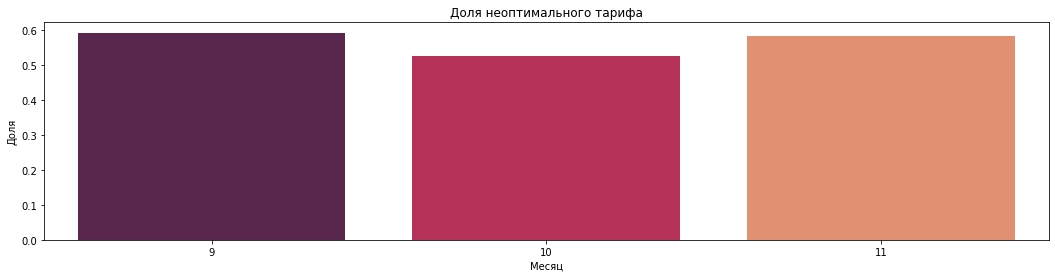

In [101]:
#посмотрим на диаграмме распределение неоптимального тарифа
plt.figure(figsize=(18, 4))
ax = sns.barplot(x='month', y='non_optimal_part', data=non_optimal_tariff_1, palette = 'rocket')
plt.title('Доля неоптимального тарифа')
plt.xlabel('Месяц')
plt.ylabel('Доля')
plt.show()

Несмотря на рост в абсолютных значениях, доля клиентов с неоптимальным тарифом ежемесячно остается в диапазоне от 50 до 60 %

In [102]:
#рассмотрим клиентов с оптимальными тарифами в разрезе каждого тарифного плана
optimal_tariff_info = (df_tariff.pivot_table(index = ['month','tariff_plan'],
                                              columns='optimal_tariff',
                                              values = 'allarm',
                                              aggfunc = 'count')
                       .reset_index())
optimal_tariff_info.columns = ['month', 'tariff_plan', 'A','B','C']
optimal_tariff_info['all'] = optimal_tariff_info['A'] + optimal_tariff_info['B'] + optimal_tariff_info['C']

#добавим столбец с долей клиентов с оптимальным тарифом

optimal_tariff_info['optimal_part'] = '' 

for i in range(len(optimal_tariff_info)): 
    if (optimal_tariff_info.loc[i, 'tariff_plan'] == 'A'): 
        optimal_tariff_info.at[i, 'optimal_part'] = (optimal_tariff_info.loc[i, 'A'] / optimal_tariff_info.loc[i, 'all'])                                            
    elif (optimal_tariff_info.loc[i, 'tariff_plan'] == 'B'):
        optimal_tariff_info.at[i, 'optimal_part'] =  (optimal_tariff_info.loc[i, 'B'] / optimal_tariff_info.loc[i, 'all'])
    else:
        optimal_tariff_info.at[i, 'optimal_part'] = (optimal_tariff_info.loc[i, 'C'] / optimal_tariff_info.loc[i, 'all'])

optimal_tariff_info

,month,tariff_plan,A,B,C,all,optimal_part
0,9,A,4,3,9,16,0.25
1,9,B,17,12,27,56,0.214286
2,9,C,17,10,41,68,0.602941
3,10,A,15,4,10,29,0.517241
4,10,B,33,16,34,83,0.192771
5,10,C,32,11,81,124,0.653226
6,11,A,19,2,9,30,0.633333
7,11,B,37,11,48,96,0.114583
8,11,C,41,15,79,135,0.585185


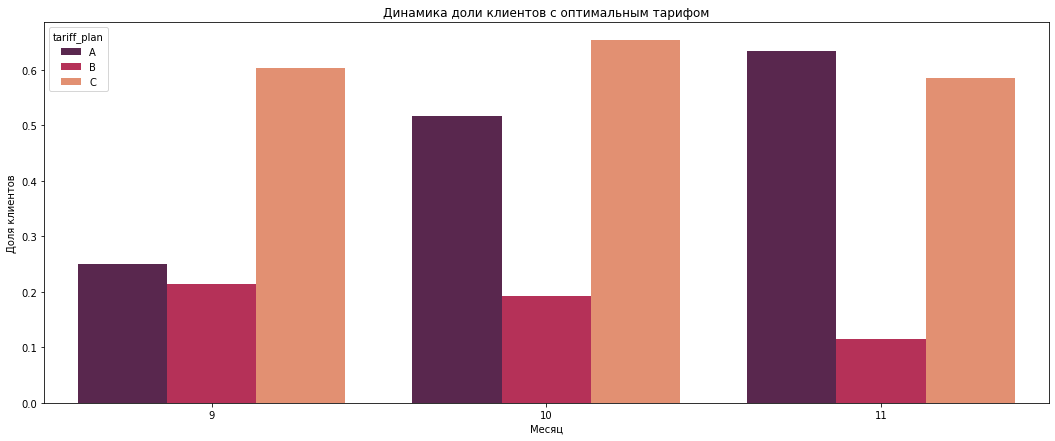

In [103]:
#посмотрим на диаграмме распределение оптимального тарифа
plt.figure(figsize=(18, 7))
ax = sns.barplot(x='month', y='optimal_part', hue = 'tariff_plan', data=optimal_tariff_info, palette = 'rocket')
plt.title('Динамика доли клиентов с оптимальным тарифом')
plt.xlabel('Месяц')
plt.ylabel('Доля клиентов')
plt.show()

Доля клиентов тарифного плана А, для которых использование данного тарифа оптимально, качественно возрастает от месяца к месяцу - с 25% в сентябре до 63 % в ноябре

Доля клиентов тарифного плана В, для которых использование данного тарифа оптимально, напротив снижается - от 21 % в сентябре до 11 % в ноябре. 

Доля клиентов тарифногог плана С, для которых использование данного тарифа оптимально, стабильно держится в районе 60 %.

Необходимо уделить особое внимание тарифному плану В: он не подходит 90% использующих его клиентов. 

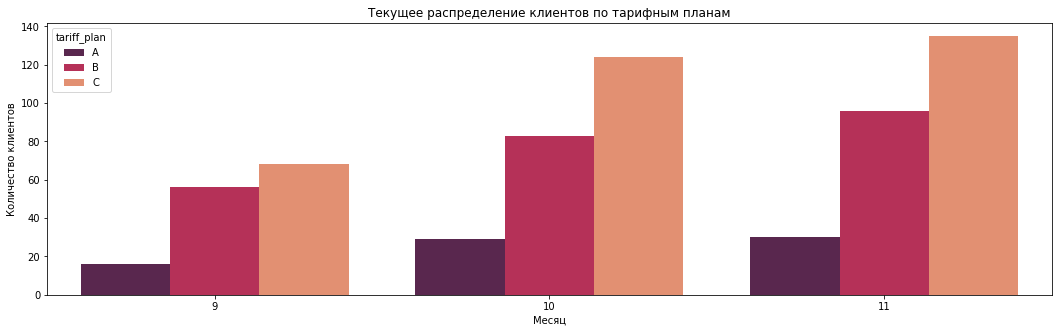

In [104]:
tariff_plan_now = (df_tariff.pivot_table(index = ['month','tariff_plan'],
                                           values = 'user_id',
                                           aggfunc = 'nunique')
                       .reset_index())
tariff_plan_now

#посмотрим на диаграмме текущее распределение клиентов по тарифам
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='month', y='user_id', hue = 'tariff_plan', data=tariff_plan_now, palette = 'rocket')
plt.title('Текущее распределение клиентов по тарифным планам')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.show()

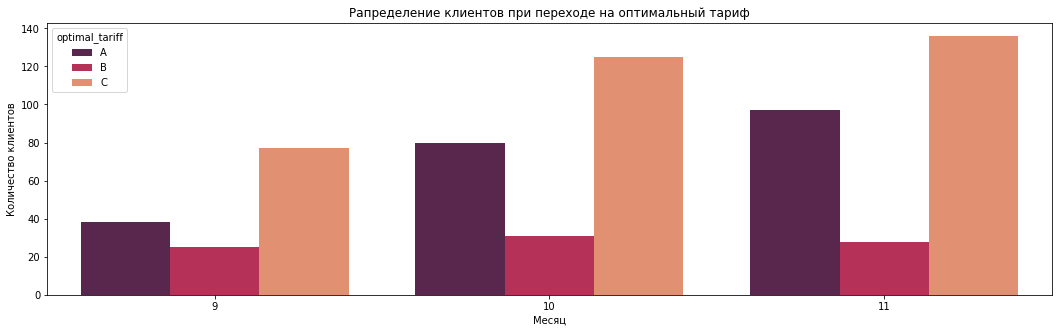

In [105]:
tariff_plan_new = (df_tariff.pivot_table(index = ['month','optimal_tariff'],
                                           values = 'user_id',
                                           aggfunc = 'nunique')
                       .reset_index())
tariff_plan_new

#посмотрим на диаграмме распределение клиентов при переходе на оптимальный тариф

plt.figure(figsize=(18, 5))
ax = sns.barplot(x='month', y='user_id', hue = 'optimal_tariff', data=tariff_plan_new, palette = 'rocket')
plt.title('Рапределение клиентов при переходе на оптимальный тариф')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов') 
plt.show()

При сопоставлении текущей и гипотетической картины распределения клиентов по тарифным планам наблюдаем резкое увеличесние клиентов на тарифе А, и значительное снижение клиентов тарифа В.  
Возвращаемся к гипотезе, что с тарифом В необходимо поработать более детально

In [106]:
#дополним нашу тарифную таблицу информацией об оптимальном тарифе

def new_price(row):
    if row['optimal_tariff'] == 'A':
        return row['A_hypo_revenue']
    elif row['optimal_tariff'] == 'B':
        return row['B_hypo_revenue']
    else:
        return row['C_hypo_revenue']

df_tariff['new_revenue'] = df_tariff.apply(new_price, axis=1)
df_tariff['overpayment'] = df_tariff['revenue'] - df_tariff['new_revenue']
df_tariff

/tmp/ipykernel_101/3611426907.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tariff['new_revenue'] = df_tariff.apply(new_price, axis=1)
/tmp/ipykernel_101/3611426907.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tariff['overpayment'] = df_tariff['revenue'] - df_tariff['new_revenue']


,user_id,month,tariff_plan,revenue,A_hypo_revenue,B_hypo_revenue,C_hypo_revenue,optimal_tariff,allarm,new_revenue,overpayment
0,166377,9,B,55435.5,35821.3,55435.5,76349.7,A,Выявлен неоптимальный тариф,35821.3,19614.2
1,166377,10,B,52413.0,34007.8,52413.0,72118.2,A,Выявлен неоптимальный тариф,34007.8,18405.2
2,166377,11,B,50592.0,32915.2,50592.0,69568.8,A,Выявлен неоптимальный тариф,32915.2,17676.8
3,166391,9,C,1600.0,4100.0,2300.0,1600.0,C,OK,1600.0,0.0
4,166391,10,C,1600.0,4100.0,2300.0,1600.0,C,OK,1600.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
632,168583,11,B,2450.0,4150.0,2450.0,1900.0,C,Выявлен неоптимальный тариф,1900.0,550.0
633,168598,11,C,1600.0,4100.0,2300.0,1600.0,C,OK,1600.0,0.0
634,168601,11,C,25134.4,14107.6,19046.0,25134.4,A,Выявлен неоптимальный тариф,14107.6,11026.8
635,168603,11,B,2893.5,4456.1,2893.5,2430.9,C,Выявлен неоптимальный тариф,2430.9,462.6


In [107]:
df_tariff_compare = df_tariff.groupby(['month'])[['revenue', 'new_revenue', 'overpayment']].sum().reset_index()
df_tariff_compare['percent'] = df_tariff_compare['new_revenue']/df_tariff_compare['revenue'] * 100-100
df_tariff_compare

,month,revenue,new_revenue,overpayment,percent
0,9,1592069.85,1032187.80,559882.05,-35.166928
1,10,3339607.60,2196580.75,1143026.85,-34.226382
2,11,4945639.85,3497764.10,1447875.75,-29.275802


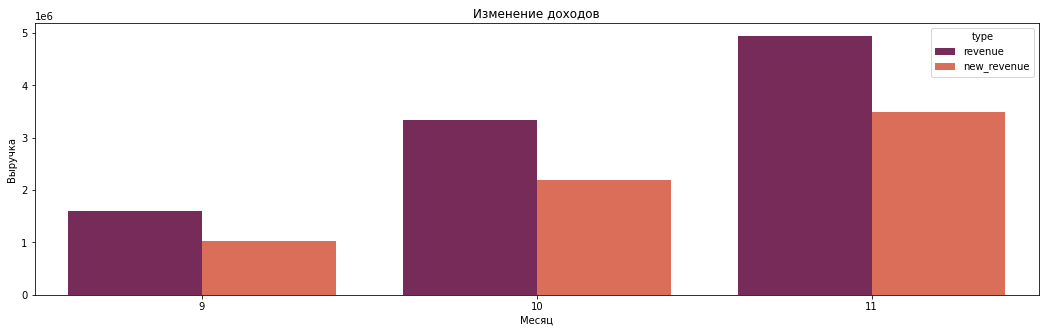

In [108]:
dtc = pd.DataFrame({'month': [9,9,10,10,11,11],
    'type':['revenue', 'new_revenue', 'revenue', 'new_revenue', 'revenue', 'new_revenue'],
    'count': [1592069.85, 1032187.80, 3339607.60, 2196580.75, 4945639.85, 3497764.10]})

plt.figure(figsize=(18, 5))
ax = sns.barplot(x='month', y='count', hue = 'type', data=dtc, palette = 'rocket')
plt.title('Изменение доходов')
plt.xlabel('Месяц')
plt.ylabel('Выручка') 
plt.show()

При переводе клиентов на оптимальных для них тариф наша компания могла потерять от 35 % выручки в сентябре до 29 % выручки в ноябре

In [109]:
#посмотрим изменения на тарифных планах

#текущая ситуация с выручкой по тарифам
df_tariff_compare_plan = df_tariff.groupby(['month', 'tariff_plan'])[['revenue']].sum().reset_index()

#выручка после перехода на оптимальный тариф
df_tariff_compare_plan_1 = df_tariff.groupby(['month', 'optimal_tariff'])[['new_revenue']].sum().reset_index()
df_tariff_compare_plan_1.columns = ['month', 'tariff_plan', 'new_revenue']

#сводная таблица
df_tariff_compare_plan = df_tariff_compare_plan.merge(df_tariff_compare_plan_1, on=['month', 'tariff_plan'], how = 'left')
df_tariff_compare_plan['percent'] = df_tariff_compare_plan['new_revenue']/df_tariff_compare_plan['revenue']*100-100
df_tariff_compare_plan

,month,tariff_plan,revenue,new_revenue,percent
0,9,A,86310.30,759253.60,779.679019
1,9,B,687222.55,112167.30,-83.678169
2,9,C,818537.00,160766.90,-80.359238
3,10,A,417160.60,1811037.10,334.134264
4,10,B,1204723.60,144532.55,-88.002846
5,10,C,1717723.40,241011.10,-85.969155
6,11,A,1266425.10,3098543.40,144.668508
7,11,B,1656081.35,131257.40,-92.074218
8,11,C,2023133.40,267963.30,-86.755036


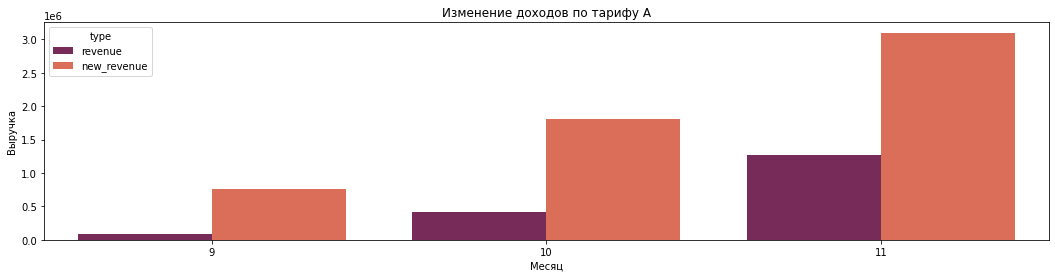

In [110]:
dtc_A = pd.DataFrame({'month': [9,9,10,10,11,11],
    'type':['revenue', 'new_revenue', 'revenue', 'new_revenue', 'revenue', 'new_revenue'],
    'count': [86310.30, 759253.60, 417160.60, 1811037.10, 1266425.10, 3098543.40 ]})

plt.figure(figsize=(18, 4))
ax = sns.barplot(x='month', y='count', hue = 'type', data=dtc_A, palette = 'rocket')
plt.title('Изменение доходов по тарифу А')
plt.xlabel('Месяц')
plt.ylabel('Выручка') 
plt.show()

При переводе клиентов на оптимальный тариф, доходы на тарифе А "взлетели бы в космос": выручка бы увеличилась в 9 раз в сентябре, в 4 раза в октябре и в 2,5 раза в ноябре

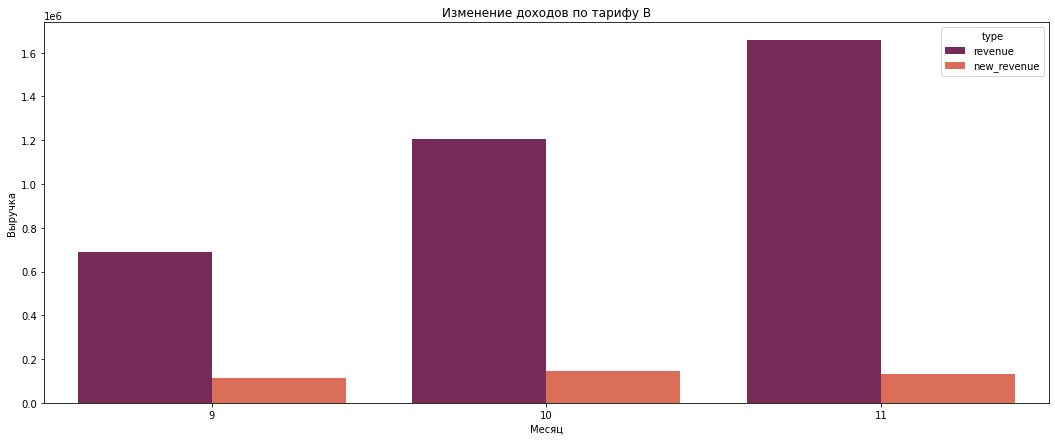

In [111]:
dtc_B = pd.DataFrame({'month': [9,9,10,10,11,11],
    'type':['revenue', 'new_revenue', 'revenue', 'new_revenue', 'revenue', 'new_revenue'],
    'count': [687222.55, 112167.30, 1204723.60, 144532.55, 1656081.35, 131257.40]})

plt.figure(figsize=(18, 7))
ax = sns.barplot(x='month', y='count', hue = 'type', data=dtc_B, palette = 'rocket')
plt.title('Изменение доходов по тарифу В')
plt.xlabel('Месяц')
plt.ylabel('Выручка') 
plt.show()

Тариф В, как наимее подходящий кому-либо, показал бы падение доходов до 92%

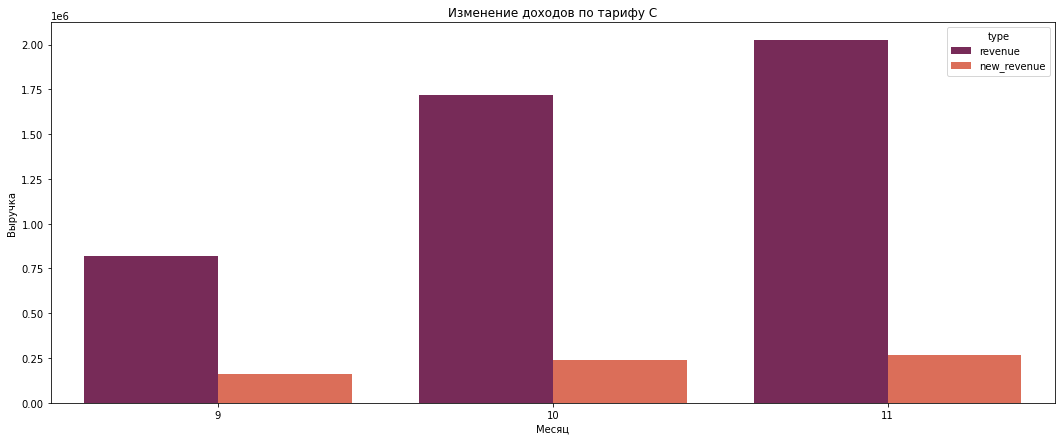

In [112]:
dtc_С = pd.DataFrame({'month': [9,9,10,10,11,11],
    'type':['revenue', 'new_revenue', 'revenue', 'new_revenue', 'revenue', 'new_revenue'],
    'count': [818537.00, 160766.90, 1717723.40, 241011.10, 2023133.40, 267963.30]})

plt.figure(figsize=(18, 7))
ax = sns.barplot(x='month', y='count', hue = 'type', data=dtc_С, palette = 'rocket')
plt.title('Изменение доходов по тарифу С')
plt.xlabel('Месяц')
plt.ylabel('Выручка') 
plt.show()

<div class="alert alert-warning">
    
**Комментарий ревьюера - 2**

**#можно лучше**

Вообще вводить числа вручную для построения графиков - это ошибка.

А если наши расчеты чуть-чуть изменятся. Например, немного скорректируется предобработка, то все придетя вбивать заново... На практике корректировки происходят достаточно часто в процессе работы над проектом. А в больших проектах легко можно пропустить ячейки, в которых ты руками вбила числа и графики будут уже не соответствовать данным.
</div>

Тариф С также сильно упал бы в своей доходности - до 85%

In [113]:
#посмотрим переплаты клиентов

client_overpayment = df_tariff.groupby(['user_id', 'month'])['revenue', 'overpayment'].sum().reset_index()
client_overpayment = client_overpayment.query('overpayment != 0')
client_overpayment

/tmp/ipykernel_101/4085655373.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  client_overpayment = df_tariff.groupby(['user_id', 'month'])['revenue', 'overpayment'].sum().reset_index()


,user_id,month,revenue,overpayment
0,166377,9,55435.5,19614.2
1,166377,10,52413.0,18405.2
2,166377,11,50592.0,17676.8
9,166405,9,36229.0,12131.6
10,166405,10,89342.4,33376.7
...,...,...,...,...
631,168583,10,2450.0,550.0
632,168583,11,2450.0,550.0
634,168601,11,25134.4,11026.8
635,168603,11,2893.5,462.6


In [114]:
client_overpayment.describe()

,user_id,month,revenue,overpayment
count,359.000000,359.000000,359.000000,359.000000
mean,167298.359331,10.192201,21496.024513,8776.558914
std,595.855937,0.787007,32922.748894,15951.258350
min,166377.000000,9.000000,2150.000000,7.200000
25%,166823.000000,10.000000,2914.850000,588.325000
50%,167172.000000,10.000000,7284.000000,1845.400000
75%,167747.000000,11.000000,25692.500000,8579.400000
max,168606.000000,11.000000,216202.500000,84401.000000


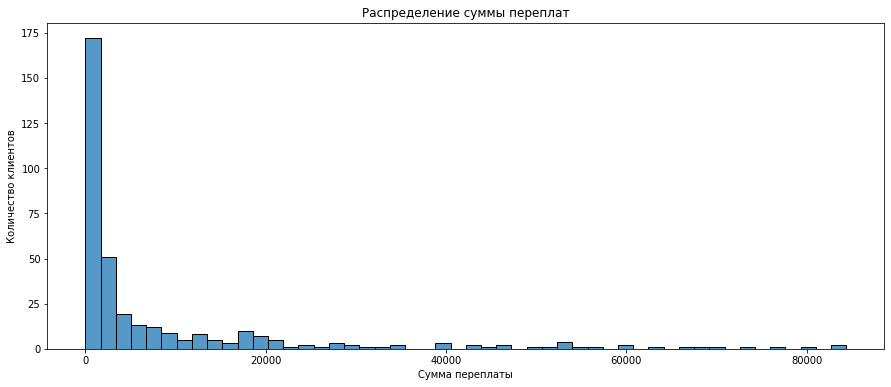

In [115]:
#построитм гистограмму для распределения перепалат клиентов
plt.figure(figsize=(15,6))
sns.histplot(data=client_overpayment, x="overpayment", bins = 50, palette = 'rocket')
plt.xlabel("Сумма переплаты")
plt.ylabel("Количество клиентов")
plt.title("Распределение суммы переплат")

plt.show()

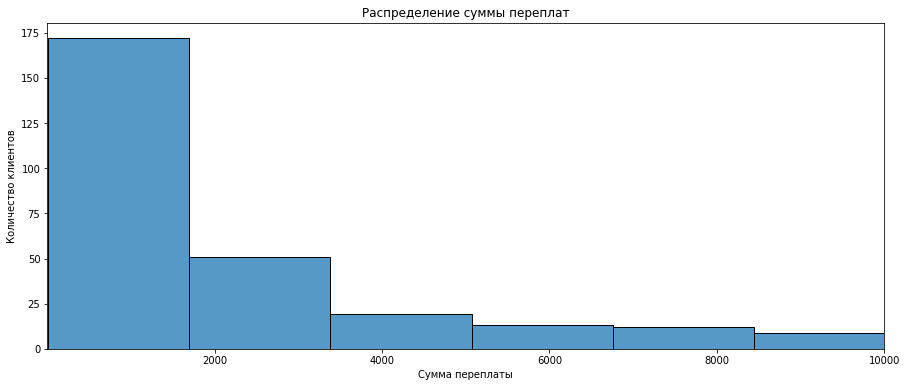

In [116]:
#сузим диапазон переплаты
plt.figure(figsize=(15,6))
sns.histplot(data=client_overpayment, x="overpayment", bins = 50,  palette = 'rocket')
plt.xlabel("Сумма переплаты")
plt.ylabel("Количество клиентов")
plt.title("Распределение суммы переплат")
plt.xlim(1, 10000)
plt.show()

По гистограмме и описанию видим, что в 50% случаев переплат не превышает 2000. Посмотрим более детально первые 50%

In [117]:
client_overpayment_first = client_overpayment.query('overpayment < 2000')
client_overpayment_first['percent'] = client_overpayment_first['overpayment']/client_overpayment_first['revenue']*100
client_overpayment_first

/tmp/ipykernel_101/3274748258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_overpayment_first['percent'] = client_overpayment_first['overpayment']/client_overpayment_first['revenue']*100


,user_id,month,revenue,overpayment,percent
15,166407,9,5489.8,462.6,8.426536
18,166428,9,2600.0,400.0,15.384615
19,166428,10,2600.0,400.0,15.384615
20,166428,11,2600.0,400.0,15.384615
29,166487,11,6375.4,664.4,10.421307
...,...,...,...,...,...
630,168579,11,2450.0,550.0,22.448980
631,168583,10,2450.0,550.0,22.448980
632,168583,11,2450.0,550.0,22.448980
635,168603,11,2893.5,462.6,15.987558


In [118]:
client_overpayment_first['percent'].describe()

count    185.000000
mean      17.479473
std       11.636568
min        0.176678
25%        8.704102
50%       15.384615
75%       29.342111
max       41.176471
Name: percent, dtype: float64

In [119]:
#вернемся к основному датасету. добавим столбец с процентами
df_tariff['percent'] = df_tariff['overpayment']/df_tariff['revenue']*100

#добавим столбец с новым тарифом. Для тех клиентов, переплата которых меньше 2000 и при этом эта сумма меньше 30% от платежа, 
#оставим их текущий тариф

df_tariff ['new_tariff'] = ''

for i in range(len(df_tariff)): 
    if ((df_tariff.loc[i, 'overpayment'] < 2000) & (df_tariff.loc[i, 'percent'] <= 30)): 
        df_tariff.at[i, 'new_tariff'] = df_tariff.at[i, 'tariff_plan'] 
    else:
        df_tariff.at[i, 'new_tariff'] = df_tariff.at[i, 'optimal_tariff']
        
#добавим столбец с новыми доходами

def newest_price(row):
    if row['new_tariff'] == 'A':
        return row['A_hypo_revenue']
    elif row['new_tariff'] == 'B':
        return row['B_hypo_revenue']
    else:
        return row['C_hypo_revenue']

df_tariff['newest_revenue'] = df_tariff.apply(newest_price, axis=1)
df_tariff

/tmp/ipykernel_101/901491190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tariff['percent'] = df_tariff['overpayment']/df_tariff['revenue']*100
/tmp/ipykernel_101/901491190.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tariff ['new_tariff'] = ''
/tmp/ipykernel_101/901491190.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,user_id,month,tariff_plan,revenue,A_hypo_revenue,B_hypo_revenue,C_hypo_revenue,optimal_tariff,allarm,new_revenue,overpayment,percent,new_tariff,newest_revenue
0,166377,9,B,55435.5,35821.3,55435.5,76349.7,A,Выявлен неоптимальный тариф,35821.3,19614.2,35.382021,A,35821.3
1,166377,10,B,52413.0,34007.8,52413.0,72118.2,A,Выявлен неоптимальный тариф,34007.8,18405.2,35.115716,A,34007.8
2,166377,11,B,50592.0,32915.2,50592.0,69568.8,A,Выявлен неоптимальный тариф,32915.2,17676.8,34.939911,A,32915.2
3,166391,9,C,1600.0,4100.0,2300.0,1600.0,C,OK,1600.0,0.0,0.000000,C,1600.0
4,166391,10,C,1600.0,4100.0,2300.0,1600.0,C,OK,1600.0,0.0,0.000000,C,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,168583,11,B,2450.0,4150.0,2450.0,1900.0,C,Выявлен неоптимальный тариф,1900.0,550.0,22.448980,B,2450.0
633,168598,11,C,1600.0,4100.0,2300.0,1600.0,C,OK,1600.0,0.0,0.000000,C,1600.0
634,168601,11,C,25134.4,14107.6,19046.0,25134.4,A,Выявлен неоптимальный тариф,14107.6,11026.8,43.871348,A,14107.6
635,168603,11,B,2893.5,4456.1,2893.5,2430.9,C,Выявлен неоптимальный тариф,2430.9,462.6,15.987558,B,2893.5


In [120]:
df_tariff_compare_new = df_tariff.groupby(['month'])[['revenue', 'newest_revenue']].sum().reset_index()
df_tariff_compare_new['percent'] = df_tariff_compare_new['newest_revenue']/df_tariff_compare_new['revenue'] * 100-100
df_tariff_compare_new

,month,revenue,newest_revenue,percent
0,9,1592069.85,1055002.45,-33.733909
1,10,3339607.60,2224284.00,-33.396846
2,11,4945639.85,3528500.75,-28.654313


Что при переводе всех пользователей, что при переводе только коиентов с большой переплатой, значительно падение доходов не изменяется

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

В целом жестких требований к итогам нет. Но хотелось бы добавить какую-то визуализацию. Это и в презентацию удобно вставить. Как изменилось распределение по тарифам после прехода? Как мог бы измениться доход, по месяцам после перехода?
</div>

**Краткие выводы**

- 30 клиентов используют тарифный планы А (11%), 96 клиентов - тарифный план Б (37%) и 135 клиентов - тарифный план С (52%)
- Среднее количество операторов среди клиентов А - 5 человек, среди клиентов Б - 4 человека, среди клиентов С - 3 человека
- У 151 клиента (58%) выявлен неоптимальный тариф
- Среди клиентов тарифа А можем порекомендовать 2 клиентам (6%) перейти на тариф Б, 9 клиентам (30%) перейти на тариф С, 19 клиентов (63%) работают с оптимальным для них тарифом
- Среди клиентов тарифа Б наблюдается самый низкий процент соответствия клиентских потребностей и тарифных платежей: лишь 12 клиентов (12%) работают на оптимальном для низ тарифе, остальным выгоднее было бы перейти на тарифный план А (37 клиентов или 39%) или С (47 клиентов или 49%)
- Среди клиентов тарифа С 79 клиентов (59 %) работают на оптимальном для себя тарифном плане, однако 41 клиенту (31%) можно порекомендовать перейти на тарифный план А , а 15 клиентам (11%) перейти на тарифный план Б
- В целом при переходе клиентов на наиболее выгодные для них тарифные планы наша компания потеряет в месяц до 40 % чистой прибыли

## Проверка гипотез

### Гипотеза № 1

**Уровень дополнительного дохода за счет использования клиентами неоптимального тарифа не отличается для разных тарифных планов**

**Нулевая гипотеза (H0)** - уровень дополнительного дохода за счет использования клиентами неоптимального тарифа статистически значимо не отличается между разными тарифами  

**Альтернативная гипотеза (H1)** - уровень дополнительного дохода за счет использования клиентами неоптимального тарифа статистически значимо отличается между разными тарифами

**Статистическая значимость** - 5%

In [121]:
def tariff_to_another_mannwhit(database, tariff1, tariff2):
    alpha = 0.05  # критический уровень статистической значимости
    results = (stats.mannwhitneyu(df_tariff[df_tariff['tariff_plan'] == tariff1]['overpayment'],
                                 df_tariff[df_tariff['tariff_plan'] == tariff2]['overpayment'])[1])
    print ('Сравнение расходов тарифов {} и {}:'.format(tariff1, tariff2))
    print("p-value: {0:.5f}".format(results))
    
    if results < alpha:
        print('Отвергаем нулевую гипотезу о равенстве средних рейтингов')
    else:
        print('Не отвергаем нулевую гипотезу о равенстве средних рейтингов')
    

In [122]:
tariff_to_another_mannwhit(df_tariff, 'A', 'B')

Сравнение расходов тарифов A и B:
p-value: 0.00089
Отвергаем нулевую гипотезу о равенстве средних рейтингов


In [123]:
tariff_to_another_mannwhit(df_tariff, 'A', 'C')

Сравнение расходов тарифов A и C:
p-value: 0.61122
Не отвергаем нулевую гипотезу о равенстве средних рейтингов


In [124]:
tariff_to_another_mannwhit(df_tariff, 'B', 'C')

Сравнение расходов тарифов B и C:
p-value: 0.00000
Отвергаем нулевую гипотезу о равенстве средних рейтингов


**Вывод**:

Для клиентов тарифа В в сопоставлении с тарифами А и С p-value очень маленькое, меньше любого осмысленного alpha, значит, нулевая гипотеза H0 отвергнута: уровень дополнительного дохода с клиентов тарифа В за счет использования неоптимального тарифа статистически значимо отличается от тарифа В и С

При это между тарифами А и С p-value выше статистически значимого значения 5%, значит между этими тарифами уровень дополнительного дохода за счет использования клиентами неоптимального тарифа статистически значимо не отличается 

### Гипотеза № 2

**Средний доход от клиентов колл-центра (преимущественно внешние исходящие звонки) и службы поддержки (преимущественно внешние входящие звонки) не отличаются**

**Нулевая гипотеза (H0)** - уровень дохода от клиентов "колл-центра" и "службы поддержки" статистически значимо не отличается 

**Альтернативная гипотеза (H1)** - уровень дохода от клиентов "колл-центра" и "службы поддержки" статистически значимо отличается 

**Статистическая значимость** - 5%

In [125]:
#добавим в таблицу с тарифами данные по типу клиента
stat_pivot = df_tariff.merge(user_call_pivot_1, on='user_id', how = 'left')
stat_pivot = stat_pivot[['user_id', 'month', 'revenue', 'client_type']]
stat_pivot_ex_in = stat_pivot.query('client_type == "external_in"')
stat_pivot_ex_out = stat_pivot.query('client_type == "external_out"')
stat_pivot_ex_in = stat_pivot_ex_in.groupby('user_id')['revenue'].mean()
stat_pivot_ex_out = stat_pivot_ex_out.groupby('user_id')['revenue'].mean()

alpha = 0.05 

#проведем t-тест Стьюдента для проверки гипотезы
results = stats.ttest_ind(stat_pivot_ex_in, stat_pivot_ex_out)

print(results.pvalue)

#oценка результатов t-теста
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве доходов медду разными типами клиентов')
else:
    print('Не отвергаем нулевую гипотезу о равенстве доходов медду разными типами клиентов')

5.954242000364513e-14
Отвергаем нулевую гипотезу о равенстве доходов медду разными типами клиентов


<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Самое главное, нужны 2 гипотезы, а у тебя пока проверена только одна. Нулевая и аьтернативная гипотезы - это две части одной гипотезы, а нужно две разные.
    
И в этой представленной гипотезе я не очень понимаю идею. По формулировке как-будто нужно сравнивать то, сколько человек платит с тем сколько он платил бы на оптимальном тарифе. Но ты сравниваешь гипотетические выручки с разных тарифов. Т.е. если клиент на тарифе С, а оптимальный для него тариф А, то нужно сравнивать только А и С, не нужно смотреть А и В или В и С, т.к. не очень понятно, что это нам дает.
    
Поясни, что это нам дает с бизнесовой точки зрения и скорректируй формулировки. Или соответственно поправь проверку.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
 
Скорректировала
    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Все верно. Теперь суть гипотез намного болеее понятная. Да, можно такие гипотезы проверить, достаточно интересную доплнительную информацию получаем.
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Нужны подробные итоговые выводы
</div>

## Выводы

- Проанализированы данные за период с 2 августа по 28 ноября 2019 года (4 месяца)

**Клиенты**

- В датасете включены только новые клиенты, зарегистрировавшиеся в системе в период с 1 августа по 31 октября 2019 года, поэтому такие низкие показатели в начале периода наблюдения. В среднем в день было зарегистрировано 4 новых клиента
- 41 пользователей из 303 (13%) не оформляли подписку на ноябрь 2019 года
- После удаления неактивных пользователей в нашем датафрейме осталось 261 клиент (86% )
- Преимущественно наши клиенты имеют от 2 до 5 операторов, однако встречаются и крупные компании со штатом оператов свыше 20 человек (6 компаний)

**Звонки**

- Прослеживается тенденция активных звонков в будние дни и минимум звонков в выходные
- Количество внешних исходящих звонков значительно превышает все остальные категории в каждом месяце (от 59% в октябре до 63% в сентябре и ноябре)
- Количество внешних входящих звонков составляет порядка 35 % ежемесячно (33,8% в сентябре, 38,6% в октябре, 33,5% в ноябре)
- Внутренние звонки не пользуются большой популярностью, преимущественно это внутренние исходящие звонки (2,5% ежемесячно)

**Тарифный планы**

- Самый популярный ***тариф С*** -  на нем зарегистрировано 135 клиентов (52%), на ***тарифе В*** - 96 клиентов (37%) и ***тариф А*** с наименьшим количеством клиентов - 30 человек (11%)
- На тарифном плане А преобладают клиенты категории "колл-центр" (преимущественно внешние исходящие звонки)
- Тариф план В и С характеризуется большим количеством клиентов "службы поддержки" (преимущестенно внешние входящие звонки)
- Наибольшую выручку нам приносят клиенты тарифа С, однако и количество клиентов на этом тарифе гораздо выше А и В.
- Наибольшую выручка на 1 клиента приносит тариф А, более того выручка от клиентов тарифа А в течение 3 месяцев стремительно росла (почти в 8 раз).Выручка от клиентов тарифов В и С так же показывает рост, однако горазно более плавный: тариф В - с 12,2 тыс до 17,3 тыс (+40%), тариф С - 12,0 тыс до 15,0 тыс (+25%)
- У клиентов тарифа А в ноябре 2019 г наблюдается резкий рост переплаты за превышение литита внутренних звонков (в 13 раз) и выручки за исходящие внешние звонки (в 37 раз) при этом среди клиентов других тарифов таких всплском не наблюдается. Вероятно, такая картина связана с некорректным выбором тарифа для крупных клиентов
- Несмотря на рост в абсолютных значениях, доля клиентов с неоптимальным тарифом ежемесячно остается в диапазоне от 50 до 60 %
- Доля клиентов тарифного плана А, для которых использование данного тарифа оптимально, качественно возрастает от месяца к месяцу - с 25% в сентябре до 63 % в ноябре
- Доля клиентов тарифного плана В, для которых использование данного тарифа оптимально, напротив снижается - от 21 % в сентябре до 11 % в ноябре.
- Доля клиентов тарифногог плана С, для которых использование данного тарифа оптимально, стабильно держится в районе 60 %.

**Перевод клиентов на оптимальный тариф**

- При сопоставлении текущей и гипотетической картины распределения клиентов по тарифным планам наблюдаем резкое увеличесние клиентов на тарифе А, и значительное снижение клиентов тарифа В.
- При переводе клиентов на оптимальных для них тариф наша компания могла потерять от 35 % выручки в сентябре до 29 % выручки в ноябре
- При переводе клиентов на оптимальный тариф, доходы на тарифе А "взлетели бы в космос": выручка бы увеличилась в 9 раз в сентябре, в 4 раза в октябре и в 2,5 раза в ноябре
- Тариф В, как наимее подходящий кому-либо, показал бы падение доходов до 92%
- Тариф С также сильно упал бы в своей доходности - до 85%

**Проверка гипотез**

- Проверена гипотеза ***Уровень дополнительного дохода за счет использования клиентами неоптимального тарифа не отличается для разных тарифных планов***. Для клиентов тарифа В в сопоставлении с тарифами А и С p-value очень маленькое, меньше любого осмысленного alpha, значит, нулевая гипотеза H0 отвергнута: уровень дополнительного дохода с клиентов тарифа В за счет использования неоптимального тарифа статистически значимо отличается от тарифа В и С. При это между тарифами А и С p-value выше статистически значимого значения 5%, значит между этими тарифами уровень дополнительного дохода за счет использования клиентами неоптимального тарифа статистически значимо не отличается 

- Проверена гипотеза ***Средний доход от клиентов колл-центра (преимущественно внешние исходящие звонки) и службы поддержки (преимущественно внешние входящие звонки) не отличаются***. Выявлено, что уровень дохода от клиентов "колл-центра" и "службы поддержки" статистически значимо отличается 

**Рекомендации**

- Необходимо уделить особое внимание тарифному плану В: он не подходит 90% использующих его клиентов.
- Провести А/В тестирование на удержание клиентов после перевода на оптимальный тариф
- В случае, если переводить только клиентов с переплатой больше 2000, то падение выручки останется так же в диапазоне 35%








<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Отлично.
    
Поздравляю с завершением сложного проекта. Удачи в новом году.
</div>

## Подготовка презентационных материалов

https://disk.yandex.ru/client/disk/Проект%20Яндекс

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Начало проекта отличное. Дальше запал как-будто прошел. Давай выдержим уровень проекта вплоть до итоговых выводов, получится классный итог курса.
</div>
